In [129]:
import numpy as np
import seaborn as sns
import pandas as pd
import os
from pydataset import data
from scipy import stats

# import visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# import splitting functions
from sklearn.model_selection import train_test_split

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import our own acquire and env modules
import acquire as acq
import prepare as prep
import env

> # Data Acquisition

# IRIS

In [2]:
df_iris = data('iris')
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [3]:
df_iris.shape

(150, 5)

In [4]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [5]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [6]:
df_iris.describe(exclude=object).T

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


# GOOGLE SHEET

In [7]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
csv_export_url

df_google = pd.read_csv(csv_export_url)
df_google

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [9]:
df_google.shape

(891, 12)

In [10]:
df_google.columns.to_list() # used for large files where we can just copy and paste the output
# to edit!

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [11]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
for col in df_google.columns:
    if df_google[col].dtype == 'object':
        print(f"{col} has {df_google[col].nunique()} unique values.")

Name has 891 unique values.
Sex has 2 unique values.
Ticket has 681 unique values.
Cabin has 147 unique values.
Embarked has 3 unique values.


In [14]:
df_google.select_dtypes('object').nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

# EXCEL

In [15]:
df_excel = pd.read_excel("train.xlsx", header=0)

In [16]:
df_excel_sample = df_excel.head(101)
df_excel_sample

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [17]:
df_excel.shape[0]

891

In [18]:
df_excel.columns[0:5].to_list()

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex']

In [19]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
df_excel.select_dtypes(include='object').columns.to_list()

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [21]:
# to get this into a df and then exclude the objects to get only numbers
df_excel.select_dtypes(include='object').head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [22]:
df_excel.select_dtypes(include='number').columns.to_list()

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [23]:
titanic_stats = df_excel[['Age', 'Fare']].describe()
titanic_stats

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [24]:
titanic_stats['Age'].max()-titanic_stats['Age'].min()

713.58

In [25]:
# WRONG
col_ranges = (round(df_excel.describe().max() - df_excel.describe().min(),2))
col_ranges

PassengerId    890.00
Survived       891.00
Pclass         890.16
Age            713.58
SibSp          891.00
Parch          891.00
Fare           891.00
dtype: float64

# ACQUIRE.PY

## Titanic

In [26]:
acq.get_titanic_data()

csv file found and loaded


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


## Iris

In [27]:
acq.get_iris_data()

csv file found and loaded


,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa
5,1,6,5.4,3.9,1.7,0.4,setosa
6,1,7,4.6,3.4,1.4,0.3,setosa
7,1,8,5.0,3.4,1.5,0.2,setosa
8,1,9,4.4,2.9,1.4,0.2,setosa
9,1,10,4.9,3.1,1.5,0.1,setosa


## Telco_Churn

In [28]:
acq.get_telco_churn()

csv file found and loaded


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2,1,2,9987-LUTYD,Female,0,No,No,13,Yes,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,Yes,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,2,1,1,9992-UJOEL,Male,0,No,No,2,Yes,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,Yes,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


> # Data Preparation

## IRIS

Use the function defined in acquire.py to load the iris data.

In [29]:
iris_df = acq.get_iris_data()
iris_df

csv file found and loaded


,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa
5,1,6,5.4,3.9,1.7,0.4,setosa
6,1,7,4.6,3.4,1.4,0.3,setosa
7,1,8,5.0,3.4,1.5,0.2,setosa
8,1,9,4.4,2.9,1.4,0.2,setosa
9,1,10,4.9,3.1,1.5,0.1,setosa


Drop the species_id and measurement_id columns.

In [30]:
iris_df = iris_df.drop(['species_id', 'measurement_id'], axis=1)

In [31]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Rename the species_name column to just species.

In [32]:
iris_df.rename({'species_name':'species'}, axis=1, inplace=True)

In [33]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [34]:
dummy_iris = pd.get_dummies(iris_df.species, drop_first=True)

In [35]:
iris_df = pd.concat([iris_df, dummy_iris], axis=1)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [36]:
# delete CSV before proceeding

iris_df = acq.get_iris_data()
iris_df

csv file found and loaded


,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa
5,1,6,5.4,3.9,1.7,0.4,setosa
6,1,7,4.6,3.4,1.4,0.3,setosa
7,1,8,5.0,3.4,1.5,0.2,setosa
8,1,9,4.4,2.9,1.4,0.2,setosa
9,1,10,4.9,3.1,1.5,0.1,setosa


In [37]:
clean_iris_df = acq.clean_iris(iris_df)
clean_iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


## TITANIC

Use the function defined in acquire.py to load the Titanic data.

In [38]:
titanic_df = acq.get_titanic_data()

csv file found and loaded


In [39]:
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


Drop any unnecessary, unhelpful, or duplicated columns.



In [40]:
titanic_df.drop(columns={'age', 'deck', 'embarked', 'class'}, axis=1, inplace=True)
titanic_df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,1,female,1,0,71.2833,Cherbourg,0
2,2,1,3,female,0,0,7.9250,Southampton,1
3,3,1,1,female,1,0,53.1000,Southampton,0
4,4,0,3,male,0,0,8.0500,Southampton,1


In [41]:
titanic_df.embark_town = titanic_df.embark_town.fillna(value='Southampton')

In [42]:
titanic_df.head().isnull().sum()

passenger_id    0
survived        0
pclass          0
sex             0
sibsp           0
parch           0
fare            0
embark_town     0
alone           0
dtype: int64

Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [43]:
dummy_df = pd.get_dummies(titanic_df[['sex', 'embark_town']], drop_first=True)
dummy_df.head()

,sex_male,embark_town_Queenstown,embark_town_Southampton
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [44]:
t_df = pd.concat([titanic_df,dummy_df], axis=1)

In [45]:
t_df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.



In [46]:
# delete CSV before proceeding

raw_df = acq.get_titanic_data()
raw_df.head()

csv file found and loaded


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [47]:
clean_titanic_df = acq.prep_titanic(raw_df)

In [48]:
clean_titanic_df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


## TELCO_CHURN

Use the function defined in acquire.py to load the Telco data.



In [49]:
# telco_df = acq.get_telco_churn()

In [50]:
# telco_df.head()

Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.



In [51]:
# telco_df = telco_df.drop(columns=['contract_type_id','internet_service_type_id','payment_type_id']) # keeping cust_id

In [52]:
# telco_df.info()

In [53]:
# telco_df.columns.to_list()

Gender Complete

In [54]:
# telco_df.gender = pd.get_dummies(telco_df[['gender']], drop_first=True)

In [55]:
# telco_df.gender.value_counts()

Partner Complete

In [56]:
# telco_df.partner = telco_df.partner.replace('Yes',1).replace('No',0)

In [57]:
# telco_df.partner.value_counts()

Dependents Complete

In [58]:
# telco_df.dependents = telco_df.dependents.replace('Yes',1).replace('No',0)

In [59]:
# telco_df.dependents.value_counts()

Phone Service Complete

In [60]:
# telco_df.phone_service = telco_df.phone_service.replace('Yes',1).replace('No',0)

In [61]:
# telco_df.phone_service.value_counts()

Online Security Complete

In [62]:
# telco_df.online_security = telco_df.online_security.replace('Yes',1).replace('No',0).replace('No internet service',0)

In [63]:
# telco_df.online_security.value_counts()

Online Backup Complete

In [64]:
# telco_df.online_backup = telco_df.online_backup.replace('Yes',1).replace('No',0).replace('No internet service',0)

In [65]:
# telco_df.online_backup.value_counts()

Device Protection Complete

In [66]:
# telco_df.device_protection = telco_df.device_protection.replace('Yes',1).replace('No',0).replace('No internet service',0)

In [67]:
# telco_df.device_protection.value_counts()

Tech Support Complete

In [68]:
# telco_df.tech_support = telco_df.tech_support.replace('Yes',1).replace('No',0).replace('No internet service',0)

In [69]:
# telco_df.tech_support.value_counts()

Streaming TV Complete

In [70]:
# telco_df.streaming_tv = telco_df.streaming_tv.replace('Yes',1).replace('No',0).replace('No internet service',0)

In [71]:
# telco_df.streaming_tv.value_counts()

Streaming Movies Complete

In [72]:
# telco_df.streaming_movies = telco_df.streaming_movies.replace('Yes',1).replace('No',0).replace('No internet service',0)

In [73]:
# telco_df.streaming_movies.value_counts()

Paperless Billing Complete

In [74]:
# telco_df.paperless_billing = telco_df.paperless_billing.replace('Yes',1).replace('No',0)

In [75]:
# telco_df.paperless_billing.value_counts()

Churn Complete

In [76]:
# telco_df.churn = telco_df.churn.replace('Yes',1).replace('No',0)

In [77]:
# telco_df.churn.value_counts()

Total Charges Complete

In [78]:
# telco_df.total_charges = pd.to_numeric(telco_df['total_charges'], errors='coerce')

In [79]:
# telco_df.total_charges.info()

Multiple Lines Complete

In [80]:
# telco_df.multiple_lines = telco_df.multiple_lines.replace('No phone service',0)\
# .replace('Yes',1).replace('No',0)

In [81]:
# telco_df.multiple_lines.value_counts()

Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

## MAPPING AND DUMMIES!

In [82]:
# USE MAPPING FUNCTION!! For binary values, use pd.get_dummies for non-binary columns

# telco['gender_encoded'] telco.gender.map({'Female':1, 'Male':0})

# Made new columns to not overwrite the explicitly stated strings

Contract Type, Internet Service Type, Payment Type Complete

In [83]:
# telco_df

In [84]:
# telco_dummy_df = pd.get_dummies(telco_df[['contract_type','payment_type','internet_service_type']], dummy_na=False, drop_first=[True, True, True])
# telco_dummy_df.head()

In [85]:
# telco_df

Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.



In [86]:
# delete CSV before proceeding

raw_telco = acq.get_telco_churn()

csv file found and loaded


In [87]:
clean_telco_df = acq.clean_telco(raw_telco)
clean_telco_df1 = clean_telco_df

## SPLITTING

In [88]:
# Train = 60%
# Validate and Test = 20%/20%

Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.

In [89]:
split_test_df = clean_telco_df1

In [90]:
train, test = train_test_split(split_test_df, test_size=.2, random_state=123, stratify=split_test_df.churn)

In [91]:
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.churn)

In [92]:
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (3943, 28)
validate -> (1691, 28)
test -> (1409, 28)


In [93]:
split_test_df.describe()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,monthly_charges,total_charges,churn,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7032.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,...,64.761692,2283.300441,0.265370,0.209144,0.240664,0.216101,0.335794,0.228880,0.439585,0.216669
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,...,30.090047,2266.771362,0.441561,0.406726,0.427517,0.411613,0.472301,0.420141,0.496372,0.412004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,35.500000,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,89.850000,3794.737500,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


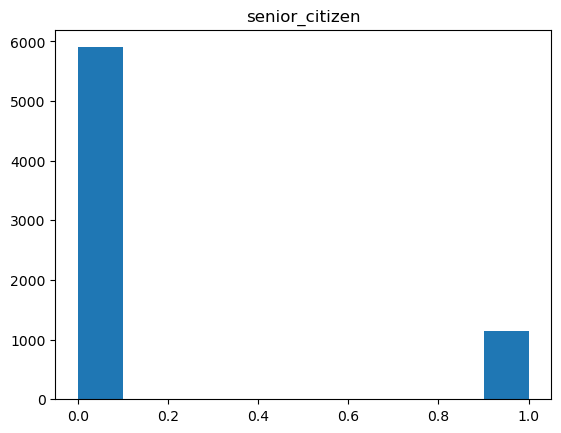

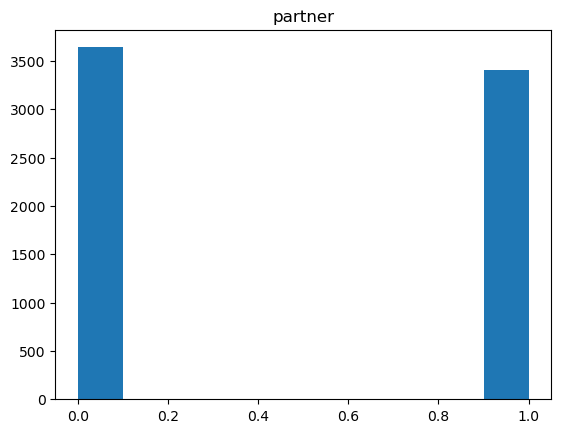

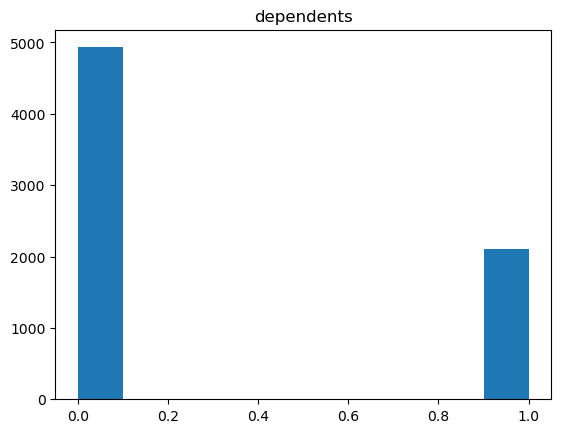

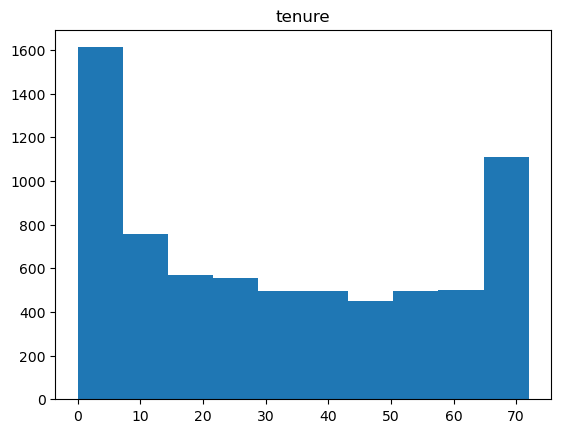

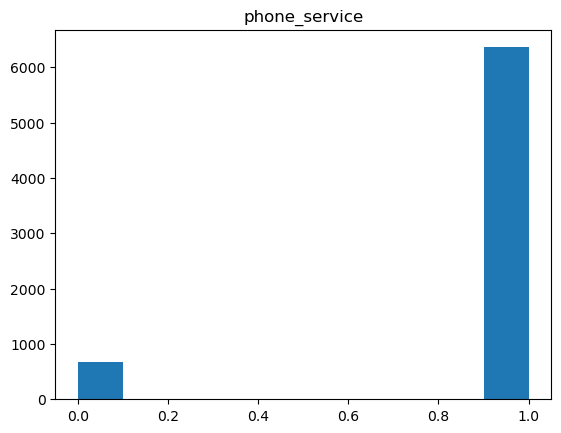

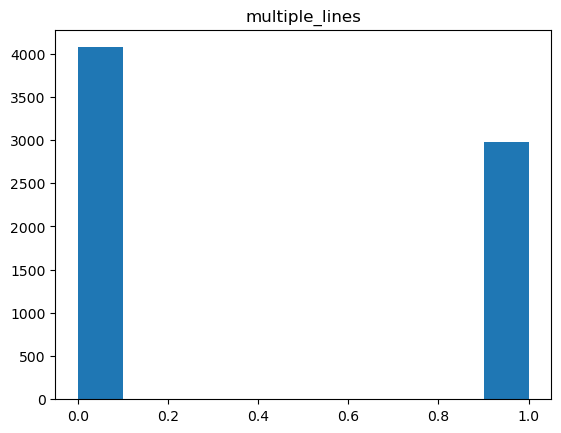

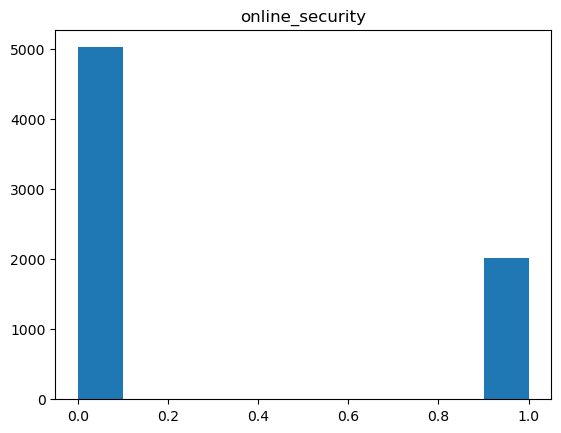

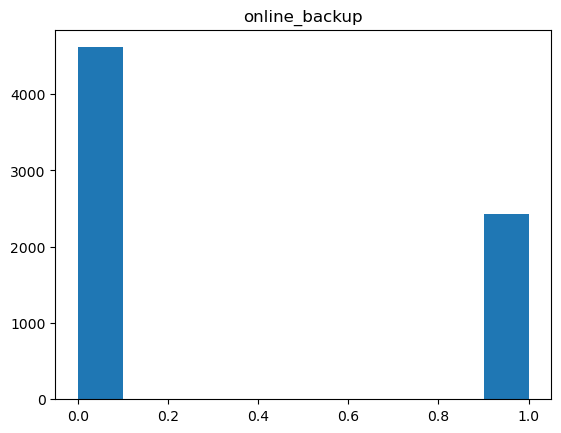

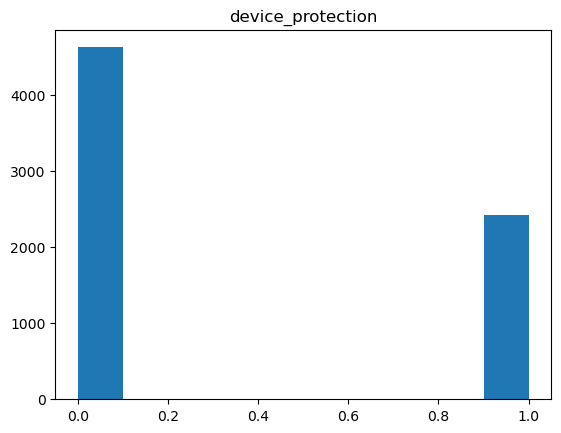

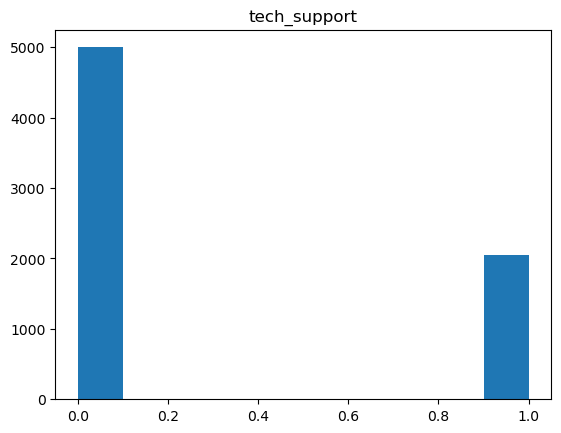

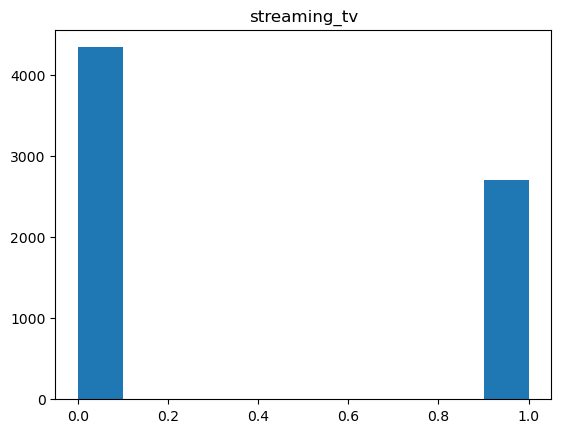

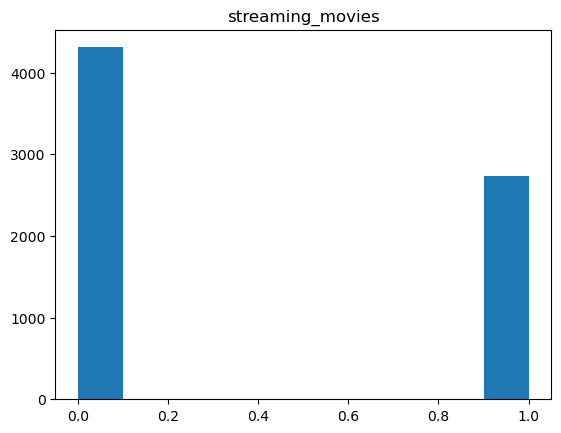

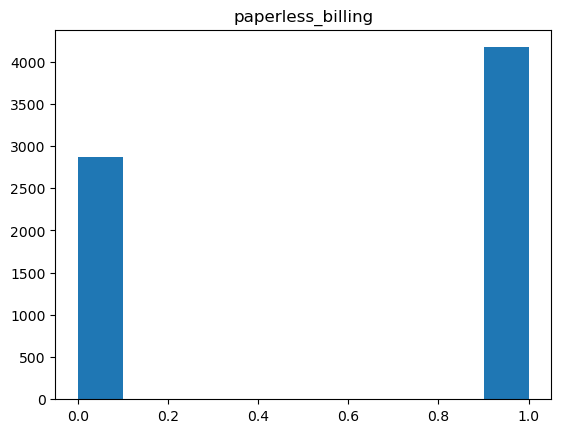

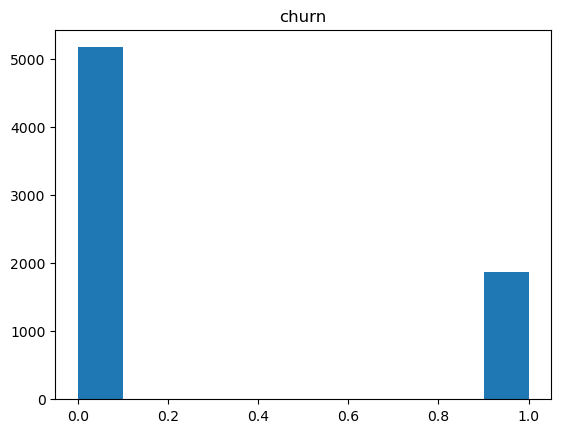

In [94]:
num_cols = split_test_df.columns[[split_test_df[col].dtype == 'int64' for col in split_test_df.columns]]
for col in num_cols:
    plt.hist(split_test_df[col])
    plt.title(col)
    plt.show()

Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.



In [95]:
train_iris, validate_iris, test_iris = acq.split_iris(clean_iris_df)

In [96]:
print(f'Prepared df: {clean_iris_df.shape}')
print()
print(f'Train: {train_iris.shape}')
print(f'Test: {test_iris.shape}')

Prepared df: (150, 8)

Train: (84, 8)
Test: (30, 8)


In [97]:
len(train_iris) / len(clean_iris_df)

0.56

In [98]:
len(test_iris) / len(clean_iris_df)

0.2

Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.

In [99]:
train_titanic, validate_titanic, test_titanic = acq.split_titanic(clean_titanic_df)

In [100]:
print(f'Train: {train_titanic.shape}')
print(f'Validate: {validate_titanic.shape}')
print(f'Test: {test_titanic.shape}')

Train: (534, 12)
Validate: (178, 12)
Test: (179, 12)


In [101]:
# train, test = train_test_split(clean_titanic_df, #dataframe
#                 random_state=123, #setting my random seed
#                 test_size=0.20, #setting the size of my test df
#                  stratify=clean_titanic_df.survived) #stratifying on my target variabl

In [102]:
# print(f'Prepared df: {clean_titanic_df.shape}')
# print()
# print(f'Train: {train.shape}')
# print(f'Test: {test.shape}')

In [103]:
len(train_titanic) / len(clean_titanic_df)

0.5993265993265994

In [104]:
len(test_titanic) / len(clean_titanic_df)

0.20089786756453423

In [105]:
# train, validate = train_test_split(train, 
#                 random_state=123,
#                  test_size=.25,
#                  stratify= train.survived
#                 )

In [106]:
print(f'Prepared df: {clean_titanic_df.shape}')
print()
print(f'Train: {train_titanic.shape}')
print(f'Validate: {validate_titanic.shape}')
print(f'Test: {test_titanic.shape}')

Prepared df: (891, 12)

Train: (534, 12)
Validate: (178, 12)
Test: (179, 12)


Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

In [107]:
train_telco, validate_telco, test_telco = acq.split_telco(clean_telco_df)

In [108]:
print(f'Train: {train_telco.shape}')
print(f'Validate: {validate_telco.shape}')
print(f'Test: {test_telco.shape}')

Train: (4225, 28)
Validate: (1409, 28)
Test: (1409, 28)


In [109]:
len(train_telco) / len(clean_telco_df)

0.5998864120403238

In [110]:
len(test_telco) / len(clean_telco_df)

0.20005679397983814

In [111]:
print(f'Prepared df: {clean_telco_df.shape}')
print()
print(f'Train: {train_telco.shape}')
print(f'Validate: {validate_telco.shape}')
print(f'Test: {test_telco.shape}')

Prepared df: (7043, 28)

Train: (4225, 28)
Validate: (1409, 28)
Test: (1409, 28)


> # EXPLORATION

>> ## IRIS

1. Acquire, prepare & split your data.

In [112]:
# acquire
iris = acq.get_iris_data()

csv file found and loaded


In [113]:
iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [114]:
iris.shape

(150, 7)

In [115]:
# prepare
iris_clean = prep.clean_iris(iris)
iris_clean.head()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


In [116]:
iris_clean.shape

(150, 8)

In [117]:
# split
train_iris, validate_iris, test_iris = prep.split_iris(iris_clean)
train_iris.shape, validate_iris.shape, test_iris.shape

((84, 8), (36, 8), (30, 8))

### 2. Univariate Stats

* For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

* For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

* Document takeaways & any actions.

## ` ~ TRAIN DATASET ~`

In [118]:
train_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 79 to 73
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  84 non-null     float64
 1   sepal_width   84 non-null     float64
 2   petal_length  84 non-null     float64
 3   petal_width   84 non-null     float64
 4   species       84 non-null     object 
 5   setosa        84 non-null     uint8  
 6   versicolor    84 non-null     uint8  
 7   virginica     84 non-null     uint8  
dtypes: float64(4), object(1), uint8(3)
memory usage: 4.2+ KB


In [119]:
col_cat = [] #this is for my categorical varibles
col_num = [] #this is for my numeric varibles

for col in train_iris.columns[:-3]:
    print(col)
    if train_iris[col].dtype == 'O':
        col_cat.append(col)
    else:
        if len(train_iris[col].unique()) < 4: # making anything with less than 4 unique variables a categorical
            col_cat.append(col)
        else:
            col_num.append(col)

sepal_length
sepal_width
petal_length
petal_width
species


In [120]:
col_cat

['species']

In [121]:
col_num

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

#### numerical variables

SEPAL_LENGTH
count    84.000000
mean      5.870238
std       0.769099
min       4.400000
25%       5.375000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64
AxesSubplot(0.125,0.11;0.775x0.77)


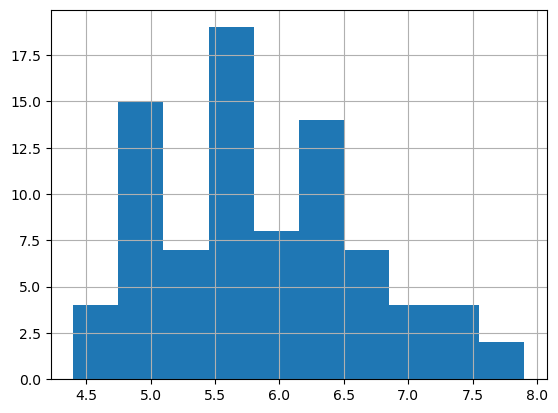

AxesSubplot(0.125,0.11;0.775x0.77)


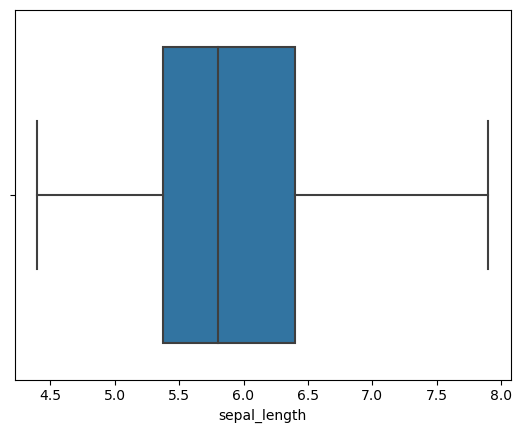


SEPAL_WIDTH
count    84.000000
mean      3.075000
std       0.448256
min       2.200000
25%       2.800000
50%       3.000000
75%       3.400000
max       4.400000
Name: sepal_width, dtype: float64
AxesSubplot(0.125,0.11;0.775x0.77)


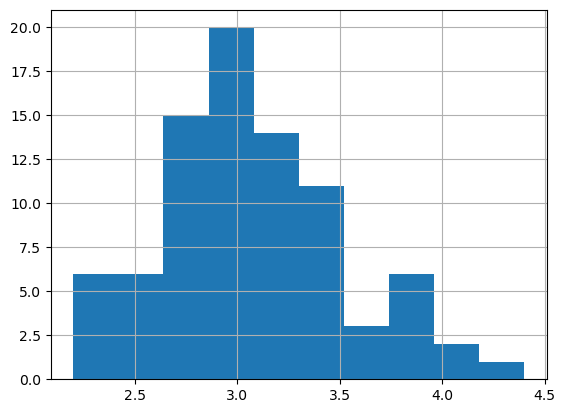

AxesSubplot(0.125,0.11;0.775x0.77)


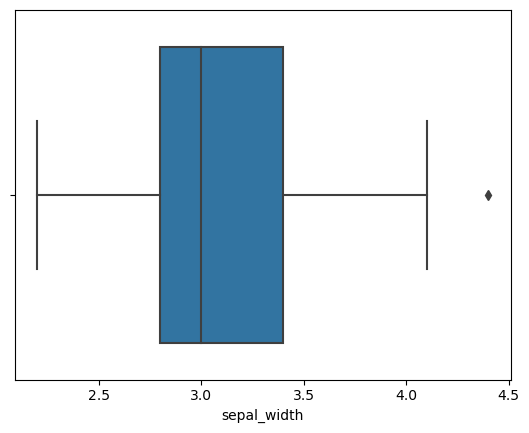


PETAL_LENGTH
count    84.000000
mean      3.771429
std       1.734940
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64
AxesSubplot(0.125,0.11;0.775x0.77)


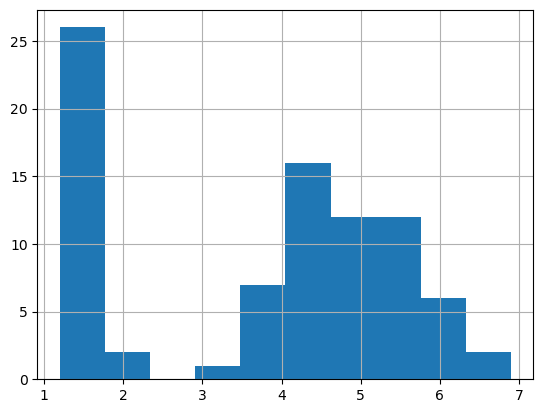

AxesSubplot(0.125,0.11;0.775x0.77)


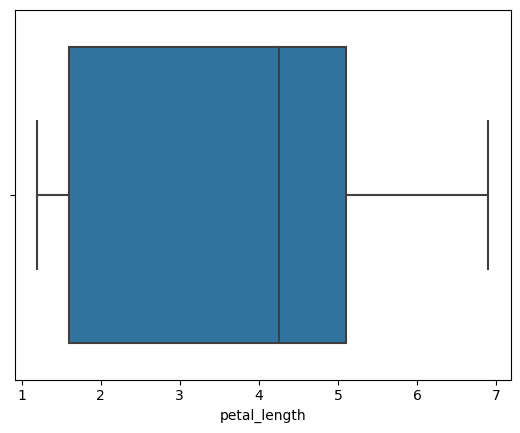


PETAL_WIDTH
count    84.000000
mean      1.203571
std       0.752577
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64
AxesSubplot(0.125,0.11;0.775x0.77)


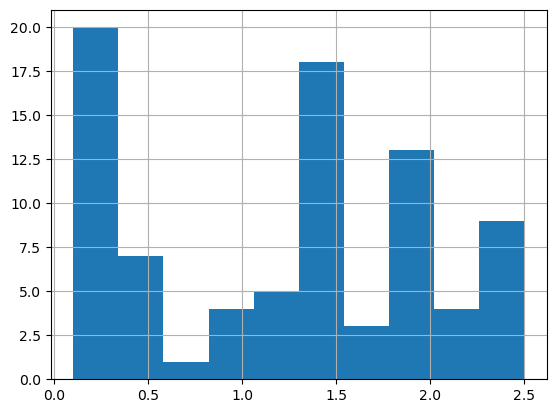

AxesSubplot(0.125,0.11;0.775x0.77)


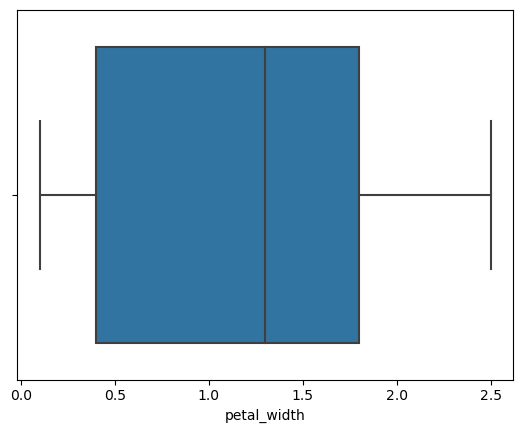

In [122]:
for col in col_num:
    print(col.upper())
    print(train_iris[col].describe())
    print(train_iris[col].hist())
    plt.show()
    print(sns.boxplot(train_iris[col]))
    plt.show()
    print()

#### observations:
1. sepal len looks to be normal
2. sepal width looks to be normal, has outliers
3. petal len is not normal
4. petal width is not normal, looks to have outliers
5. sepal len shows three distinct spikes
6. these are all features -- species is my target variable

#### categorical variables

SPECIES
versicolor    28
setosa        28
virginica     28
Name: species, dtype: int64
versicolor    0.333333
setosa        0.333333
virginica     0.333333
Name: species, dtype: float64


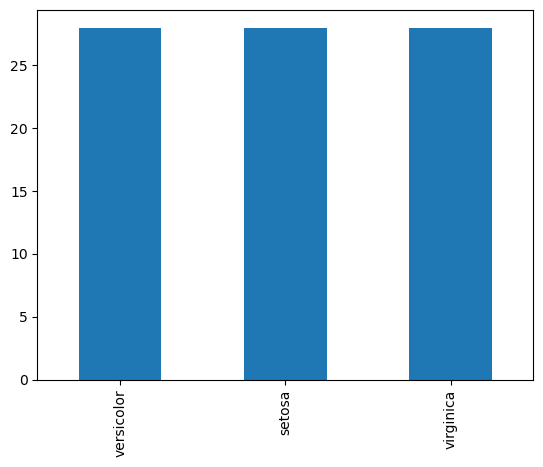

In [123]:
for col in col_cat:
    print(col.upper())
    print(train_iris[col].value_counts())
    print(train_iris[col].value_counts(normalize=True))
    train_iris[col].value_counts().plot.bar()
    plt.show()
    print()

### Bivariate Stats

* Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

* For each measurement type, compute the descriptive statistics for each species.

* For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

* Document takeaways & any actions.

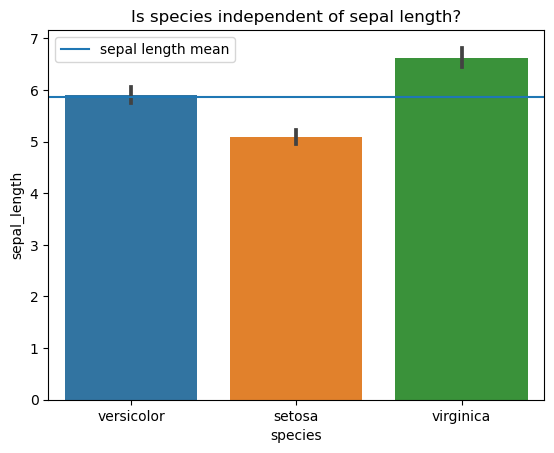

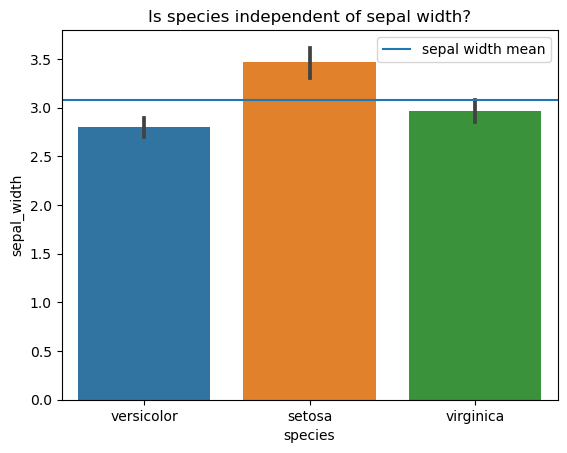

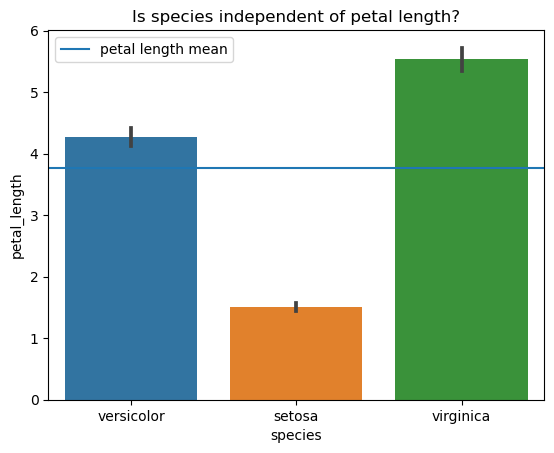

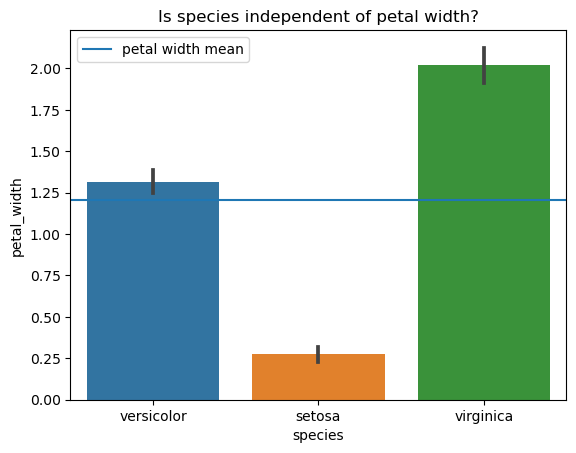

In [124]:
for col in col_num:
    sns.barplot(data=train_iris, x='species', y=col)
    plt.title(f"Is species independent of {col.lower().replace('_',' ')}?")
    pop_mn = train_iris[col].mean()
    plt.axhline(pop_mn, label=(f"{col.lower().replace('_',' ')} mean"))
    plt.legend()
    plt.show()
    print()

* For each measurement type, compute the descriptive statistics for each species.

## Visuals are Unclear - Perform Stats Test
### Sepal Length and Species

`Which test do we use?`
* Mann-Whitney because we are comparing subgroup means to each other and there is not normal distribution.

$H_0$: species is independent of sepal length

$H_a$: species is dependent of sepal length

In [125]:
α = 0.05

In [132]:
sepal_len_setosa = train_iris[train_iris.species == 'setosa'].sepal_length
sepal_len_virginica = train_iris[train_iris.species == 'virginica'].sepal_length
sepal_len_versi = train_iris[train_iris.species == 'versicolor'].sepal_length

In [144]:
t, p = stats.mannwhitneyu(sepal_len_setosa, sepal_len_versi)
t, p
print(p)
if p < α:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

3.38902518496528e-08
We reject the null hypothesis


In [145]:
t, p = stats.mannwhitneyu(sepal_len_setosa, sepal_len_virginica)
t, p
print(p)
if p < α:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

1.4320631271373019e-10
We reject the null hypothesis


In [146]:
t, p = stats.mannwhitneyu(sepal_len_virginica, sepal_len_versi)
t, p
print(p)
if p < α:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

3.082029196534108e-06
We reject the null hypothesis


### Sepal Width and Species

`Which test do we use?`
* Mann-Whitney because we are comparing not normally distributed subgroup means to each other

$H_0$: species is independent of sepal width

$H_a$: species is dependent of sepal width

In [147]:
sepal_wid_setosa = train_iris[train_iris.species == 'setosa'].sepal_width
sepal_wid_virginica = train_iris[train_iris.species == 'virginica'].sepal_width
sepal_wid_versi = train_iris[train_iris.species == 'versicolor'].sepal_width

In [148]:
t, p = stats.mannwhitneyu(sepal_wid_setosa, sepal_wid_versi)
t, p
print(p)
if p < α:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

9.838378298699357e-08
We reject the null hypothesis


In [149]:
t, p = stats.mannwhitneyu(sepal_wid_setosa, sepal_wid_virginica)
t, p
print(p)
if p < α:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

7.68824715496567e-06
We reject the null hypothesis


In [151]:
t, p = stats.mannwhitneyu(sepal_wid_versi, sepal_wid_virginica)
t, p
print(p)
if p < α:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
    print("Species of Virginica is independent of species of Versicolor in regard to sepal width")

0.05257259139845694
We fail to reject the null hypothesis
Species of Virginica is independent of species of Versicolor in regard to sepal width


### Petal Length and Species

`Which test do we use?`
* Mann-Whitney because we are comparing not normally distributed subgroup means to each other

$H_0$: species is independent of petal length

$H_a$: species is dependent of petal length

In [153]:
petal_len_setosa = train_iris[train_iris.species == 'setosa'].petal_length
petal_len_virginica = train_iris[train_iris.species == 'virginica'].petal_length
petal_len_versi = train_iris[train_iris.species == 'versicolor'].petal_length

In [155]:
t, p = stats.mannwhitneyu(petal_len_setosa, petal_len_versi)
t, p
print(p)
if p < α:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

1.280026689526043e-10
We reject the null hypothesis


In [156]:
t, p = stats.mannwhitneyu(petal_len_setosa, petal_len_virginica)
t, p
print(p)
if p < α:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

1.2763147530342772e-10
We reject the null hypothesis


In [157]:
t, p = stats.mannwhitneyu(petal_len_versi, petal_len_virginica)
t, p
print(p)
if p < α:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

2.9479835715150625e-10
We reject the null hypothesis


### Petal Width and Species

`Which test do we use?`
* Mann-Whitney because we are comparing not normally distributed subgroup means to each other

$H_0$: species is independent of petal width

$H_a$: species is dependent of petal width

In [154]:
petal_wid_setosa = train_iris[train_iris.species == 'setosa'].petal_width
petal_wid_virginica = train_iris[train_iris.species == 'virginica'].petal_width
petal_wid_versi = train_iris[train_iris.species == 'versicolor'].petal_width

In [158]:
t, p = stats.mannwhitneyu(petal_wid_setosa, petal_wid_versi)
t, p
print(p)
if p < α:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

8.337173413494075e-11
We reject the null hypothesis


In [159]:
t, p = stats.mannwhitneyu(petal_wid_setosa, petal_wid_virginica)
t, p
print(p)
if p < α:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

8.941874653666594e-11
We reject the null hypothesis


In [160]:
t, p = stats.mannwhitneyu(petal_wid_versi, petal_wid_virginica)
t, p
print(p)
if p < α:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

6.47119166980993e-10
We reject the null hypothesis


### Takeaways:

Sepal Width between Versicolor and Virginica is not significant, the Mann-Whitney test failed to reject the null hypothesis.

All other tests rejected the null hypothesis proving Species is dependent on sepal width and length and plant width and length.

# Multivariate Stats

* Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

* Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

* Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

* Document takeaways and any actions.

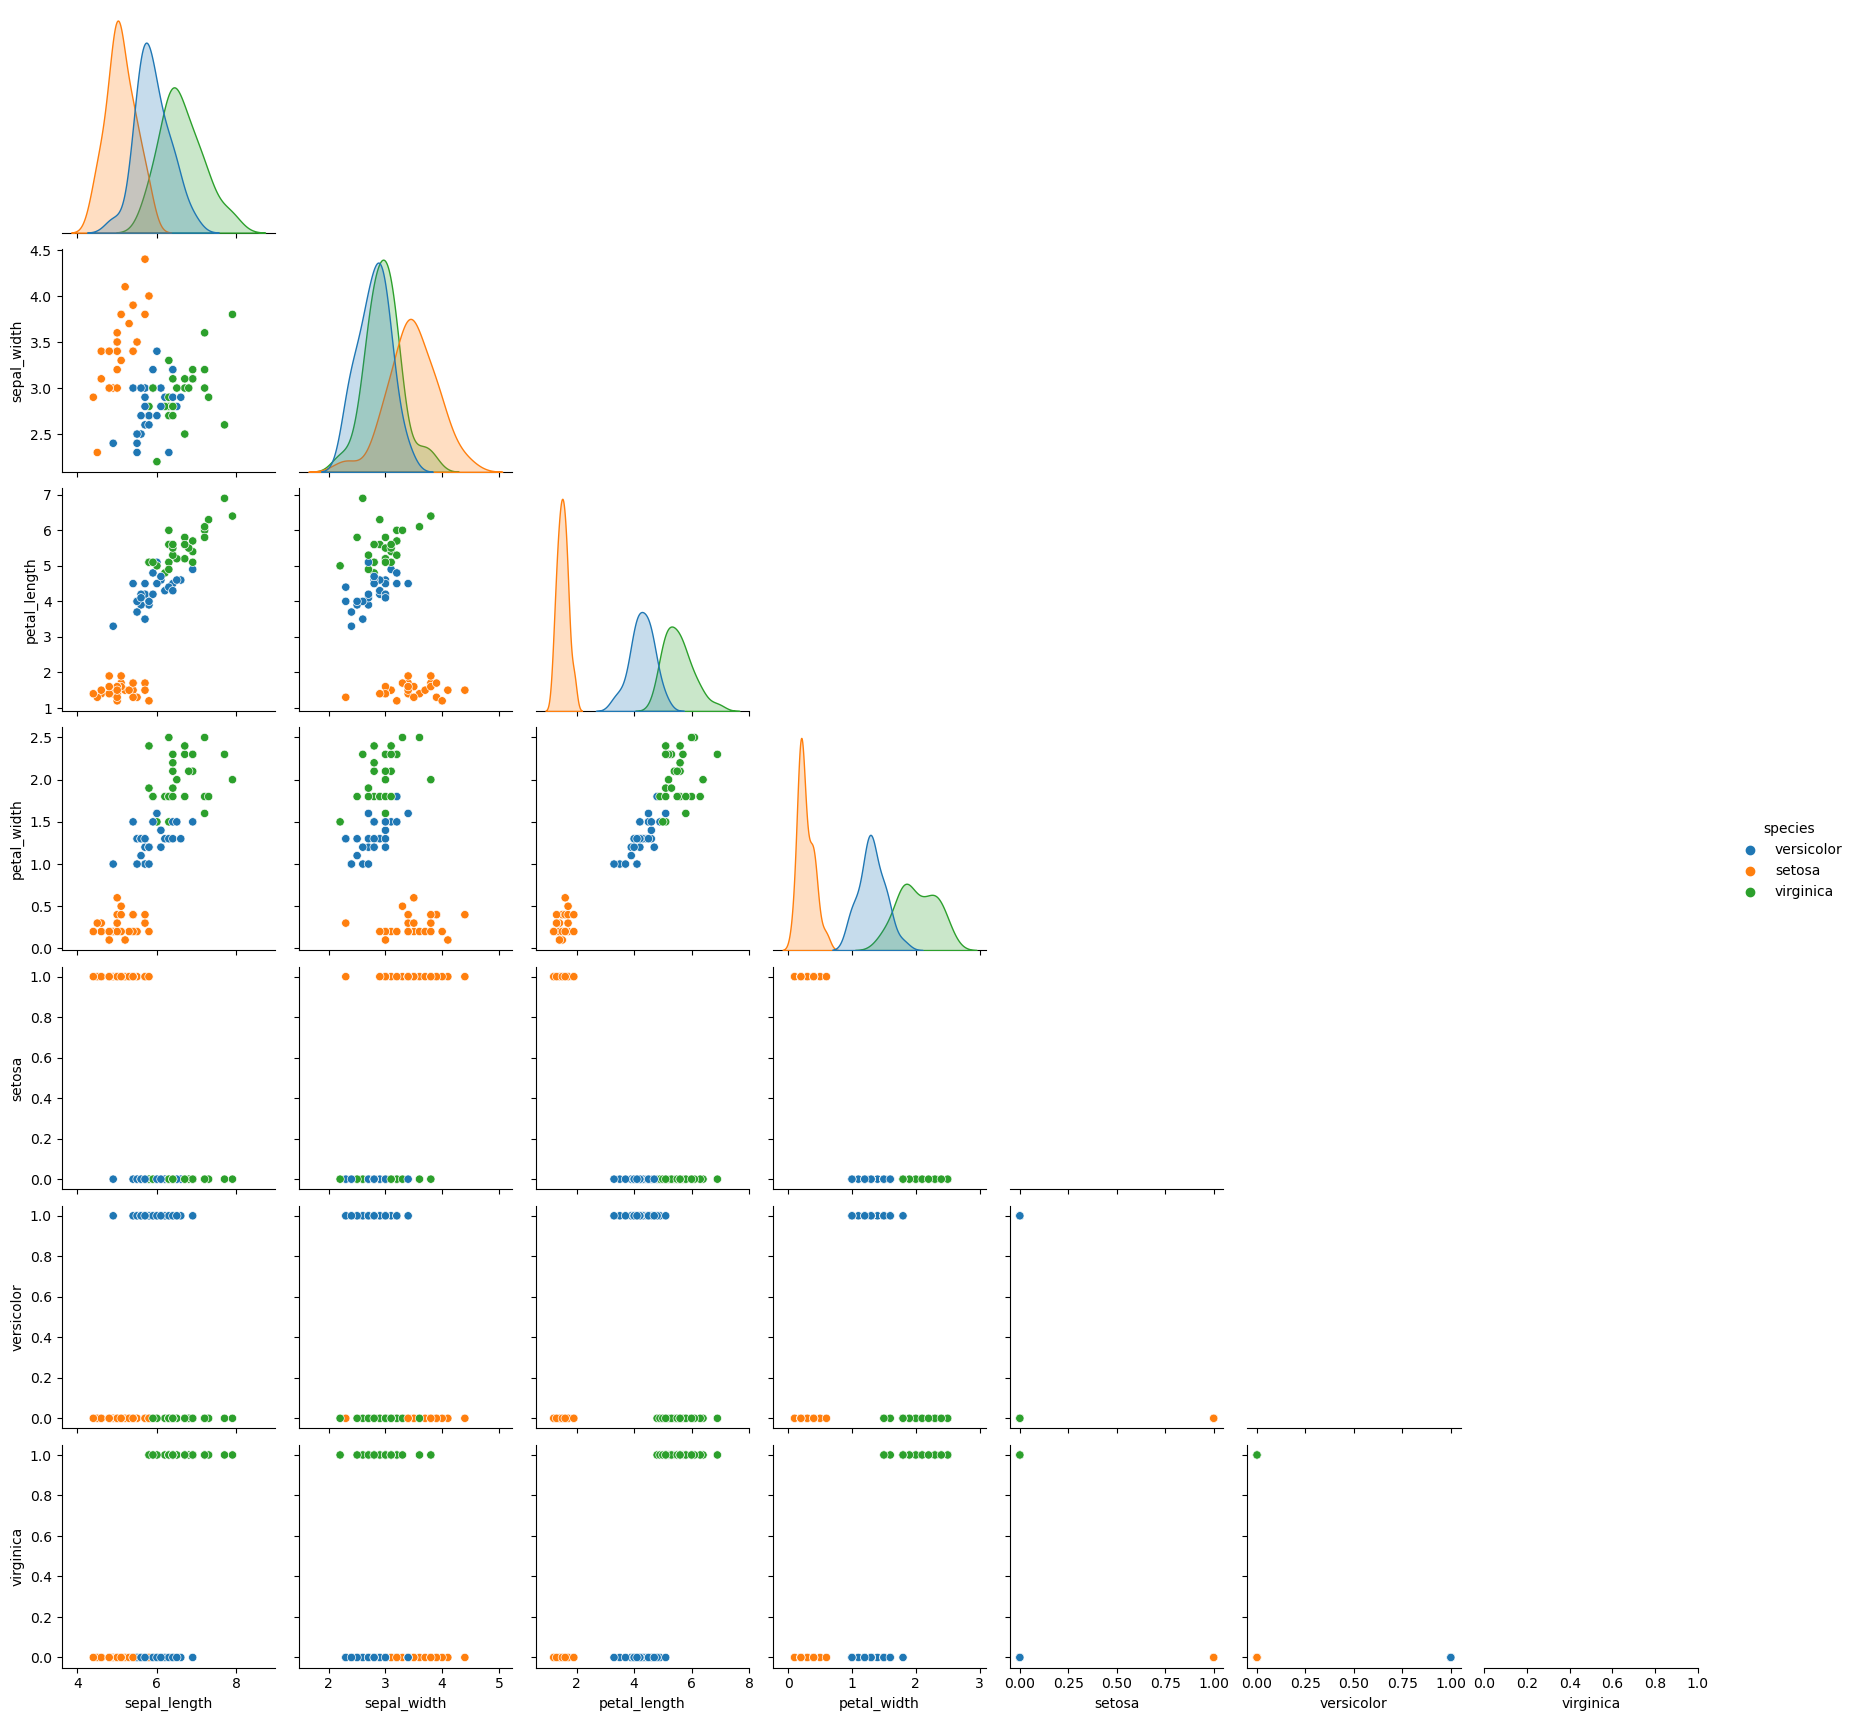

In [164]:
sns.pairplot(data=train_iris, hue='species', corner=True)
plt.show()

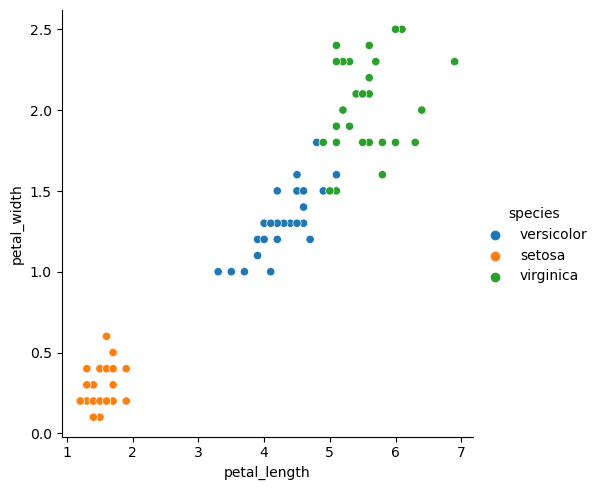

In [166]:
# visualize two numericals
sns.relplot(data=train_iris, x='petal_length', y='petal_width', hue='species')
plt.show()

#### questions:

1. is there a relationship between petal length and width?

#### observations:

* setosa is identifiable through petal area.

* versicolor and virginica are not easily identifiable through petal area

#### stats test to answer questions:

`Which test do we use?`
1. Spearman's R Correlation test because I am investigating non-parametric continous variables

$H_0$: there is no relationship between petal length and petal width

$H_a$: there is a relationship between petal length and petal width

In [168]:
acq.conclude_spearmanr(train_iris['petal_length'], train_iris['petal_width'])

r = 0.9338573168120611
p = 2.2689721089976718e-38
----
We can reject the null hypothesis.


#### stats test to answer questions:

`Which test do we use?`
2. Sepal width or Virginica and Sepal Width of Versicolor = continous, non-normal, spearman's R. 

$H_0$: there is no relationship between sepal width-virginica and sepal width-versicolor

$H_a$: there is a relationship between sepal width-virginica and sepal width-versicolor

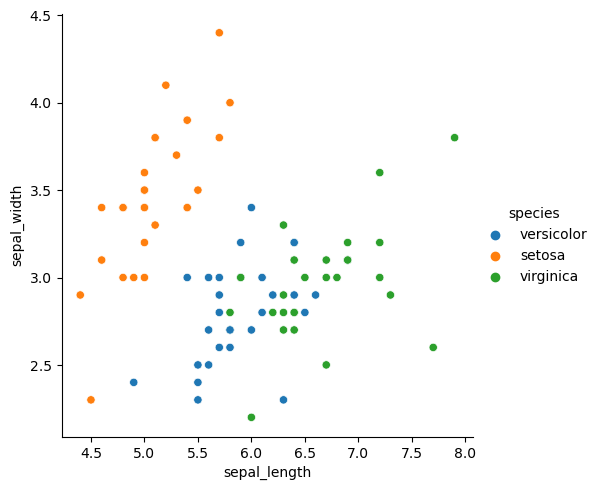

In [175]:
# visualize continued
sns.relplot(data=train_iris, x='sepal_length', y='sepal_width', hue='species')
plt.show()

In [211]:
acq.conclude_spearmanr(sepal_wid_virginica, sepal_wid_versicolor)

r = 0.4706948984327985
p = 0.01147362831109365
----
We can reject the null hypothesis.


#### questions:

* is sepal length a good indicator of species type?

* is sepal width a good indicator of specie type?

* is it possible to infer a species type from sepal area?

#### observations:

* it can be difficult to infer species type from sepal area.

* not possible to identify versicolor or virginica through sepal area.

is the sepal width signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney.

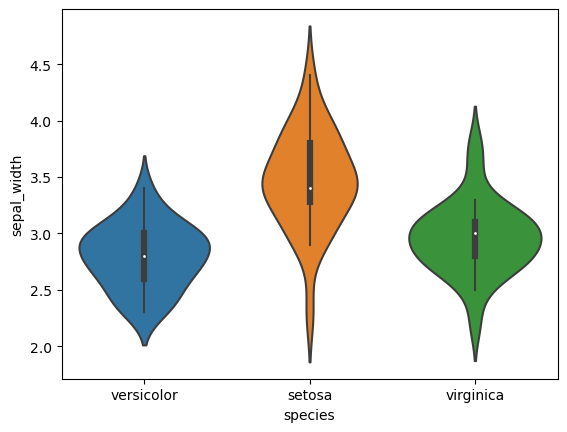

In [191]:
sns.violinplot(data=train_iris, x='species', y='sepal_width')
plt.show()

In [195]:
t, p = stats.mannwhitneyu(sepal_wid_virginica, sepal_wid_setosa)

t, p
print(p)
if p < α:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
print("The sepal width of virginica is significantly different than the sepal width of setosa.")

7.68824715496567e-06
We reject the null hypothesis
The sepal width of virginica is significantly different than the sepal width of setosa.


In [204]:
t, p = stats.mannwhitneyu(sepal_wid_virginica, sepal_wid_versi)

t, p
print(f'p = {p}')
if p < α:
    print("We reject the null hypothesis. There is significant difference.")
else:
    print("We fail to reject the null hypothesis, there is no significant difference between sepal width of virginica and sepal width of versicolor.")

p = 0.05257259139845694
We fail to reject the null hypothesis, there is no significant difference between sepal width of virginica and sepal width of versicolor.


## Takeaways:

Sepal width is significantly different between virginica and setosa but not as significantly different between virginica and versicolor. Sepal widths both rejected the null hypothesis stating there is a difference.

>> # TELCO

* Explore your telco data to discover drivers of churn

* Determine if certain columns should be dropped

* Determine if it would be valuable to bin some numeric columns

* Determine if it would be valuable to combine multiple columns into one

In [223]:
telco = acq.get_telco_churn()
telco.head()

csv file found and loaded


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [224]:
telco_clean = prep.clean_telco(telco)
telco_clean.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,contract_type,internet_service_type,payment_type,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None
0,0002-ORFBO,0,0,1,1,9,1,0,0,1,...,One year,DSL,Mailed check,1,0,0,0,1,0,0
1,0003-MKNFE,1,0,0,0,9,1,1,0,0,...,Month-to-month,DSL,Mailed check,0,0,0,0,1,0,0
2,0004-TLHLJ,1,0,0,0,4,1,0,0,0,...,Month-to-month,Fiber optic,Electronic check,0,0,0,1,0,1,0
3,0011-IGKFF,1,1,1,0,13,1,0,0,1,...,Month-to-month,Fiber optic,Electronic check,0,0,0,1,0,1,0
4,0013-EXCHZ,0,1,1,0,3,1,0,0,0,...,Month-to-month,Fiber optic,Mailed check,0,0,0,0,1,1,0


In [225]:
t_telco, v_telco, test_telco = prep.split_telco(telco_clean)
t_telco.shape, v_telco.shape, test_telco.shape

((4225, 28), (1409, 28), (1409, 28))

In [252]:
t_telco.rename(columns = {'gender':'is_male'}, inplace = True)

In [253]:
col_cat = []  #this is for my categorical varibles
col_num = [] #this is for my numeric varibles

for col in t_telco.columns:
    print(col)#this is for my numeric varibles
    if len(t_telco[col].unique()) < 4: # making anything with less than 4 unique variables a categorical
        col_cat.append(col)
    else:
        col_num.append(col)

is_male
senior_citizen
partner
dependents
tenure
phone_service
multiple_lines
online_security
online_backup
device_protection
tech_support
streaming_tv
streaming_movies
paperless_billing
monthly_charges
total_charges
churn
contract_type_One year
contract_type_Two year
payment_type_Credit card (automatic)
payment_type_Electronic check
payment_type_Mailed check
internet_service_type_Fiber optic
internet_service_type_None


> ## Categorical Values


IS_MALE
1    2149
0    2076
Name: is_male, dtype: int64
1    0.508639
0    0.491361
Name: is_male, dtype: float64


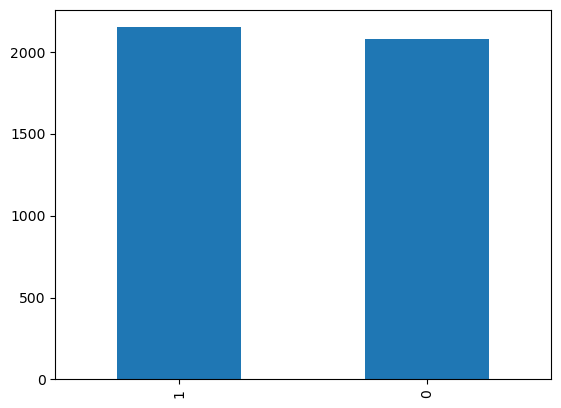



HYPOTHESIZE
H_0: is male does not affect churn
H_a: is male affects churn

VISUALIZE


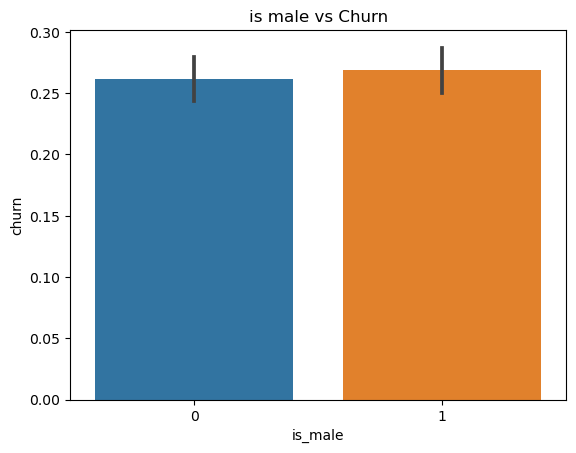


ANALYZE and SUMMARIZE
Observed
[[1533  543]
 [1571  578]]

Expected
[[1525  550]
 [1578  570]]

----
chi^2 = 0.2600
p-value = 0.6101
----
We fail to reject the null hypothesis.



SENIOR_CITIZEN
0    3541
1     684
Name: senior_citizen, dtype: int64
0    0.838107
1    0.161893
Name: senior_citizen, dtype: float64


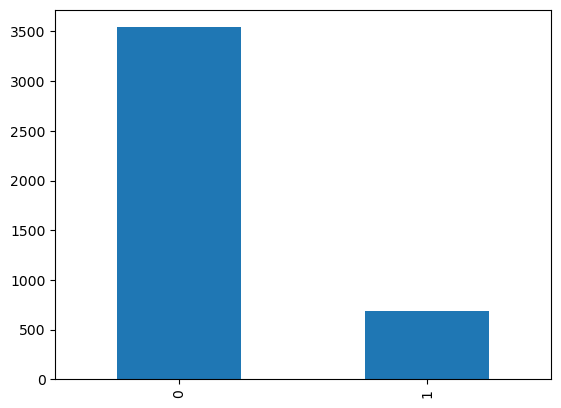



HYPOTHESIZE
H_0: senior citizen does not affect churn
H_a: senior citizen affects churn

VISUALIZE


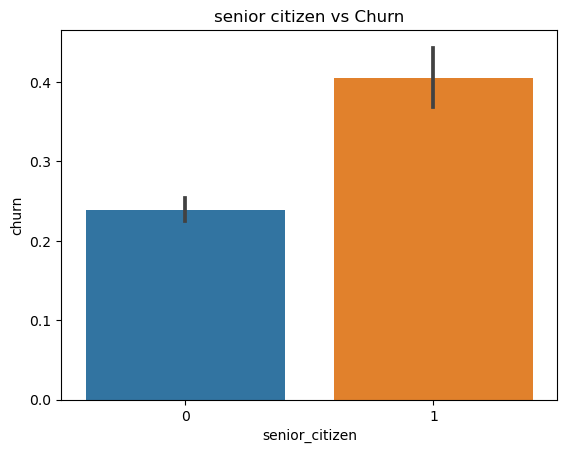


ANALYZE and SUMMARIZE
Observed
[[2697  844]
 [ 407  277]]

Expected
[[2601  939]
 [ 502  181]]

----
chi^2 = 80.7936
p-value = 0.0000
----
We reject the null hypothesis.



PARTNER
0    2161
1    2064
Name: partner, dtype: int64
0    0.511479
1    0.488521
Name: partner, dtype: float64


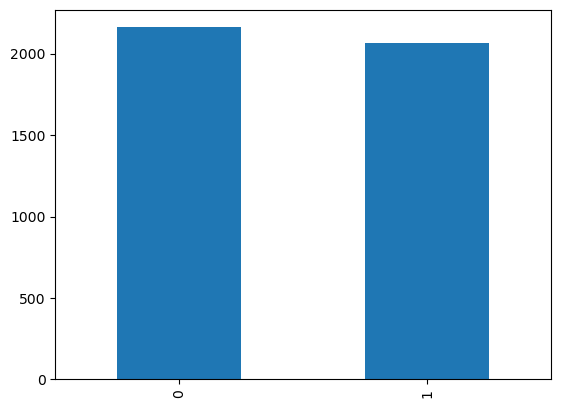



HYPOTHESIZE
H_0: partner does not affect churn
H_a: partner affects churn

VISUALIZE


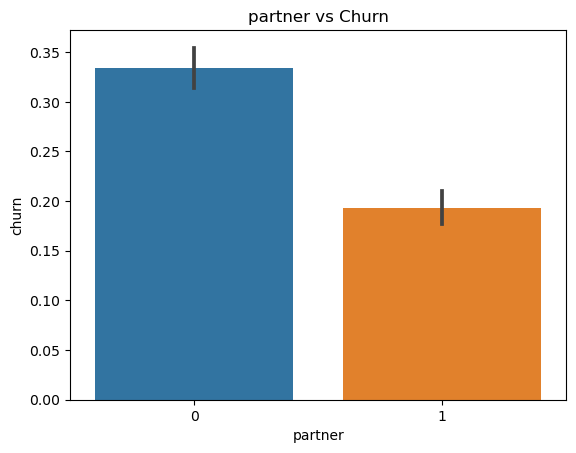


ANALYZE and SUMMARIZE
Observed
[[1439  722]
 [1665  399]]

Expected
[[1587  573]
 [1516  547]]

----
chi^2 = 106.6312
p-value = 0.0000
----
We reject the null hypothesis.



DEPENDENTS
0    2931
1    1294
Name: dependents, dtype: int64
0    0.693728
1    0.306272
Name: dependents, dtype: float64


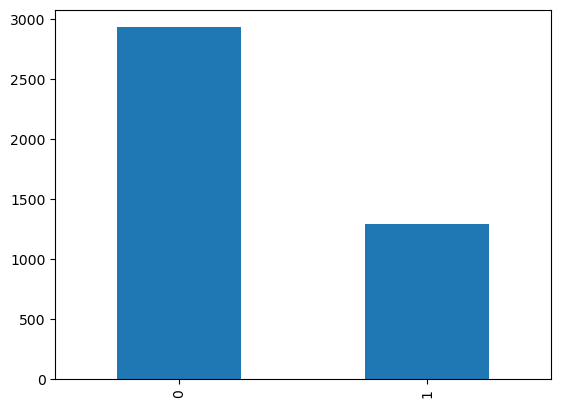



HYPOTHESIZE
H_0: dependents does not affect churn
H_a: dependents affects churn

VISUALIZE


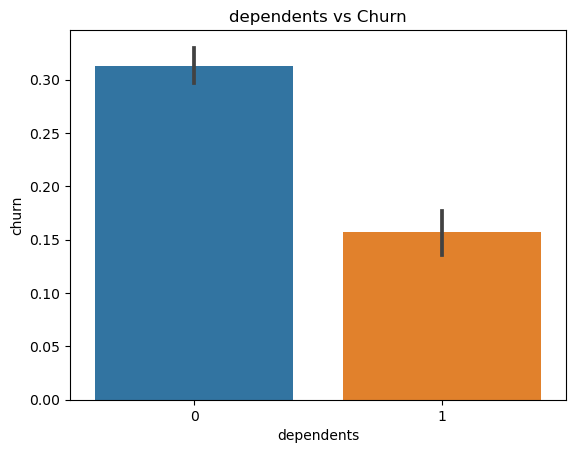


ANALYZE and SUMMARIZE
Observed
[[2013  918]
 [1091  203]]

Expected
[[2153  777]
 [ 950  343]]

----
chi^2 = 111.7405
p-value = 0.0000
----
We reject the null hypothesis.



PHONE_SERVICE
1    3832
0     393
Name: phone_service, dtype: int64
1    0.906982
0    0.093018
Name: phone_service, dtype: float64


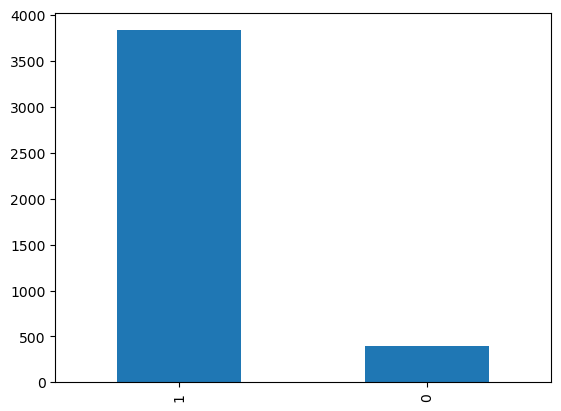



HYPOTHESIZE
H_0: phone service does not affect churn
H_a: phone service affects churn

VISUALIZE


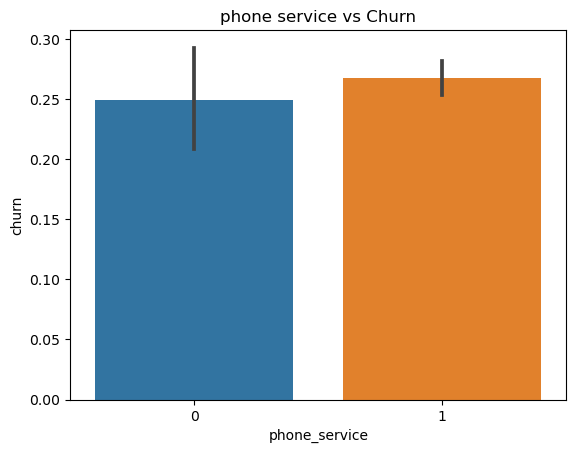


ANALYZE and SUMMARIZE
Observed
[[ 295   98]
 [2809 1023]]

Expected
[[ 288  104]
 [2815 1016]]

----
chi^2 = 0.4796
p-value = 0.4886
----
We fail to reject the null hypothesis.



MULTIPLE_LINES
0    2418
1    1807
Name: multiple_lines, dtype: int64
0    0.572308
1    0.427692
Name: multiple_lines, dtype: float64


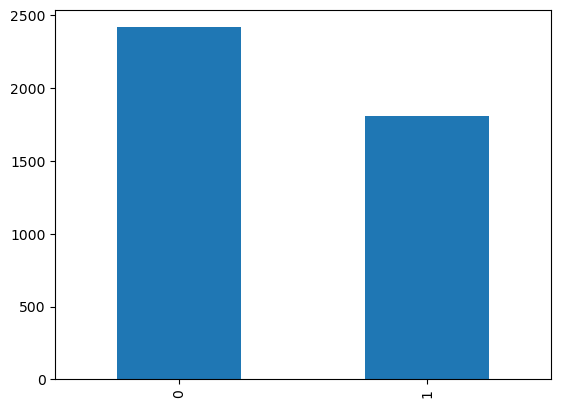



HYPOTHESIZE
H_0: multiple lines does not affect churn
H_a: multiple lines affects churn

VISUALIZE


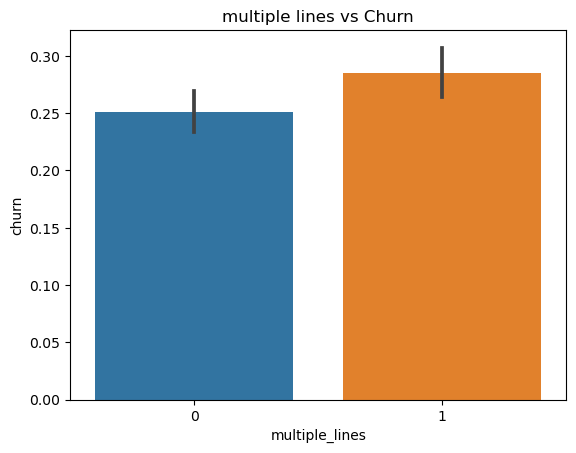


ANALYZE and SUMMARIZE
Observed
[[1812  606]
 [1292  515]]

Expected
[[1776  641]
 [1327  479]]

----
chi^2 = 6.0966
p-value = 0.0135
----
We reject the null hypothesis.



ONLINE_SECURITY
0    2993
1    1232
Name: online_security, dtype: int64
0    0.708402
1    0.291598
Name: online_security, dtype: float64


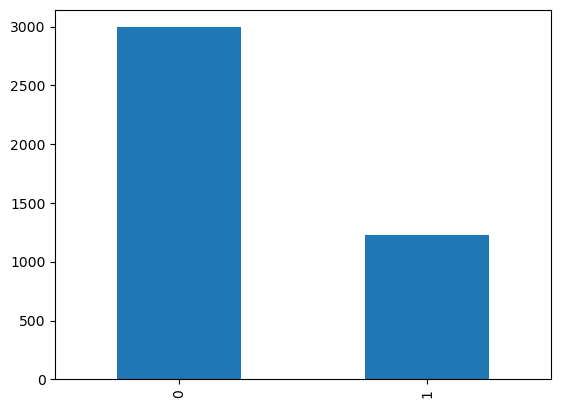



HYPOTHESIZE
H_0: online security does not affect churn
H_a: online security affects churn

VISUALIZE


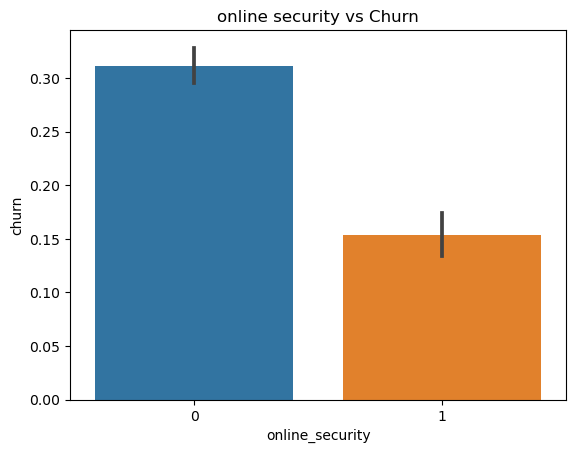


ANALYZE and SUMMARIZE
Observed
[[2061  932]
 [1043  189]]

Expected
[[2198  794]
 [ 905  326]]

----
chi^2 = 110.9401
p-value = 0.0000
----
We reject the null hypothesis.



ONLINE_BACKUP
0    2746
1    1479
Name: online_backup, dtype: int64
0    0.649941
1    0.350059
Name: online_backup, dtype: float64


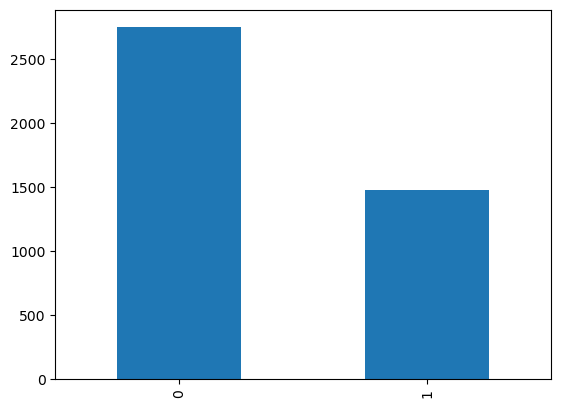



HYPOTHESIZE
H_0: online backup does not affect churn
H_a: online backup affects churn

VISUALIZE


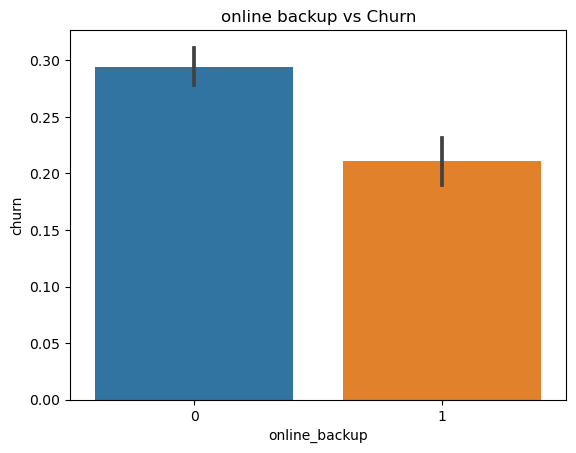


ANALYZE and SUMMARIZE
Observed
[[1937  809]
 [1167  312]]

Expected
[[2017  728]
 [1086  392]]

----
chi^2 = 34.0844
p-value = 0.0000
----
We reject the null hypothesis.



DEVICE_PROTECTION
0    2742
1    1483
Name: device_protection, dtype: int64
0    0.648994
1    0.351006
Name: device_protection, dtype: float64


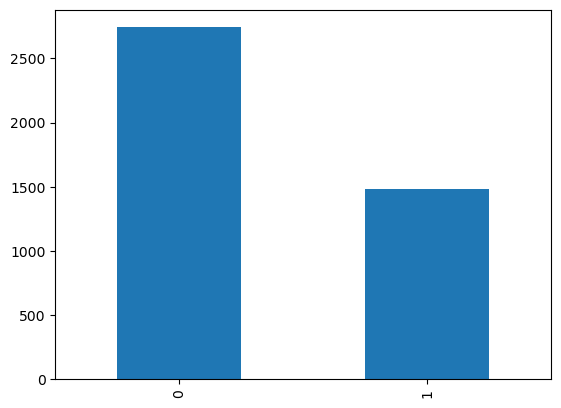



HYPOTHESIZE
H_0: device protection does not affect churn
H_a: device protection affects churn

VISUALIZE


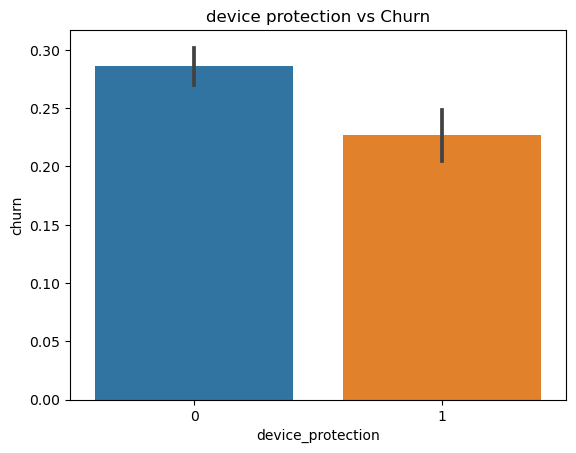


ANALYZE and SUMMARIZE
Observed
[[1958  784]
 [1146  337]]

Expected
[[2014  727]
 [1089  393]]

----
chi^2 = 16.7022
p-value = 0.0000
----
We reject the null hypothesis.



TECH_SUPPORT
0    3002
1    1223
Name: tech_support, dtype: int64
0    0.710533
1    0.289467
Name: tech_support, dtype: float64


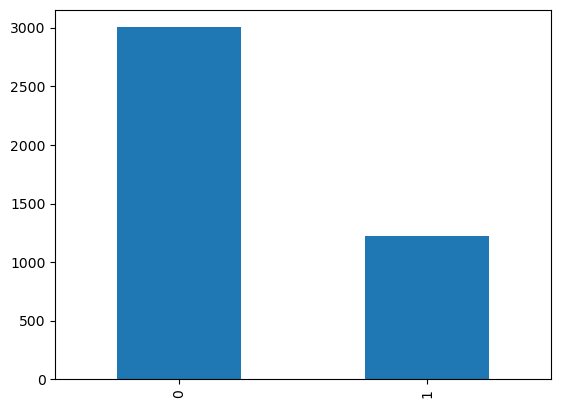



HYPOTHESIZE
H_0: tech support does not affect churn
H_a: tech support affects churn

VISUALIZE


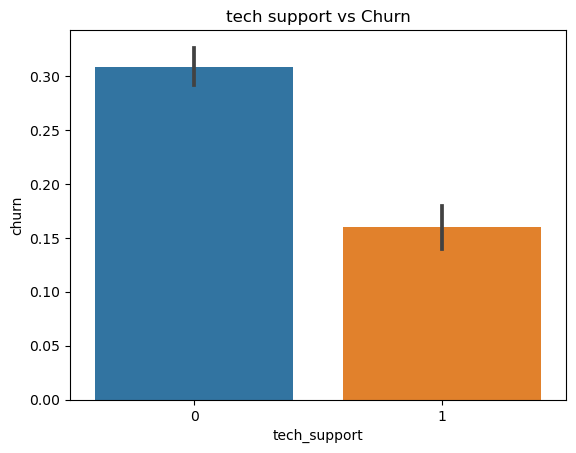


ANALYZE and SUMMARIZE
Observed
[[2076  926]
 [1028  195]]

Expected
[[2205  796]
 [ 898  324]]

----
chi^2 = 98.2309
p-value = 0.0000
----
We reject the null hypothesis.



STREAMING_TV
0    2568
1    1657
Name: streaming_tv, dtype: int64
0    0.607811
1    0.392189
Name: streaming_tv, dtype: float64


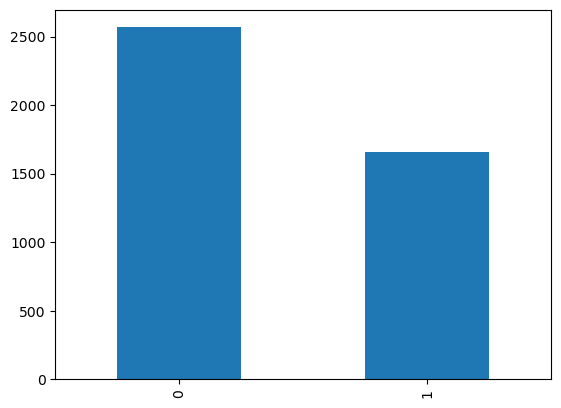



HYPOTHESIZE
H_0: streaming tv does not affect churn
H_a: streaming tv affects churn

VISUALIZE


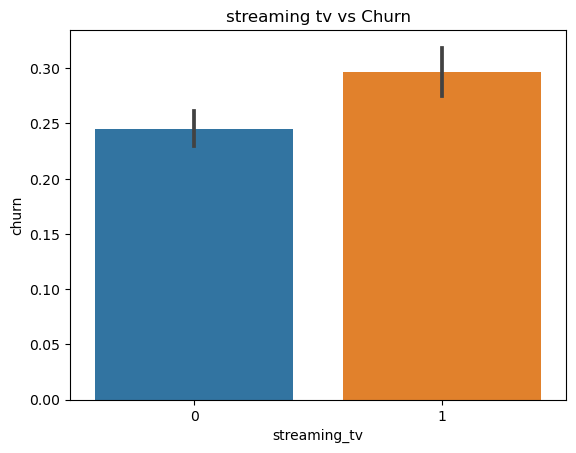


ANALYZE and SUMMARIZE
Observed
[[1938  630]
 [1166  491]]

Expected
[[1886  681]
 [1217  439]]

----
chi^2 = 13.1739
p-value = 0.0003
----
We reject the null hypothesis.



STREAMING_MOVIES
0    2554
1    1671
Name: streaming_movies, dtype: int64
0    0.604497
1    0.395503
Name: streaming_movies, dtype: float64


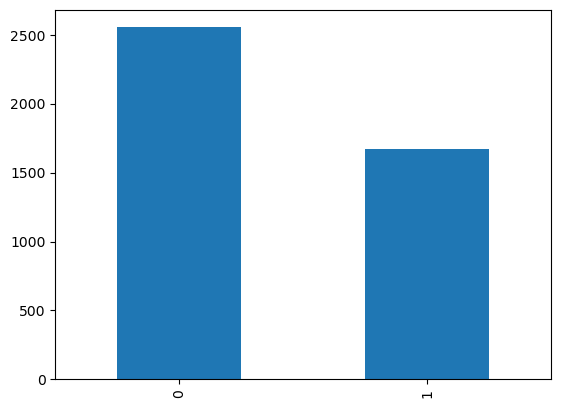



HYPOTHESIZE
H_0: streaming movies does not affect churn
H_a: streaming movies affects churn

VISUALIZE


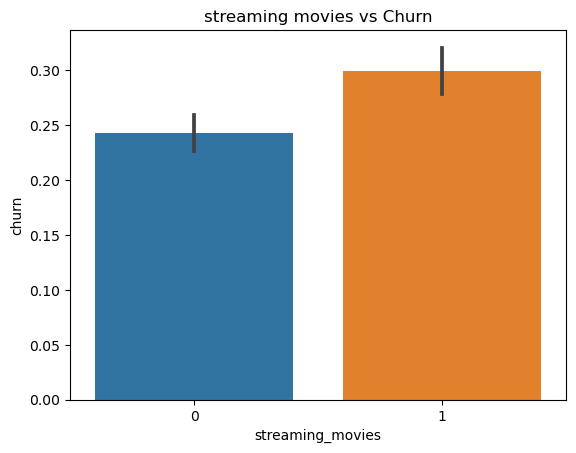


ANALYZE and SUMMARIZE
Observed
[[1934  620]
 [1170  501]]

Expected
[[1876  677]
 [1227  443]]

----
chi^2 = 16.5826
p-value = 0.0000
----
We reject the null hypothesis.



PAPERLESS_BILLING
1    2509
0    1716
Name: paperless_billing, dtype: int64
1    0.593846
0    0.406154
Name: paperless_billing, dtype: float64


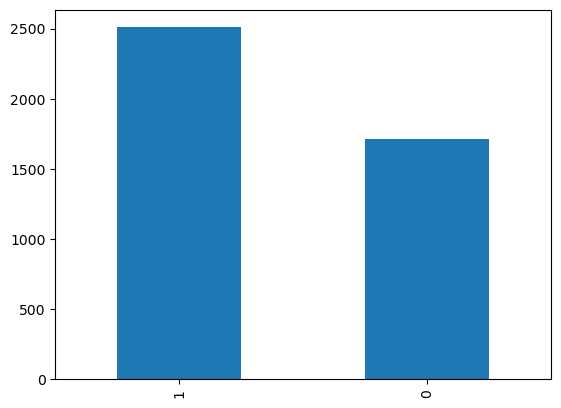



HYPOTHESIZE
H_0: paperless billing does not affect churn
H_a: paperless billing affects churn

VISUALIZE


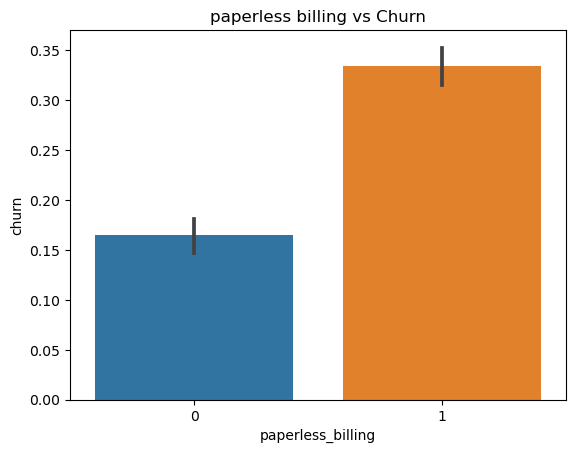


ANALYZE and SUMMARIZE
Observed
[[1433  283]
 [1671  838]]

Expected
[[1260  455]
 [1843  665]]

----
chi^2 = 148.5845
p-value = 0.0000
----
We reject the null hypothesis.



CHURN
0    3104
1    1121
Name: churn, dtype: int64
0    0.734675
1    0.265325
Name: churn, dtype: float64


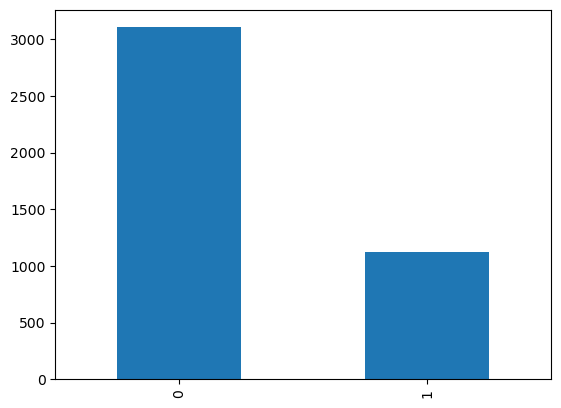



HYPOTHESIZE
H_0: churn does not affect churn
H_a: churn affects churn

VISUALIZE


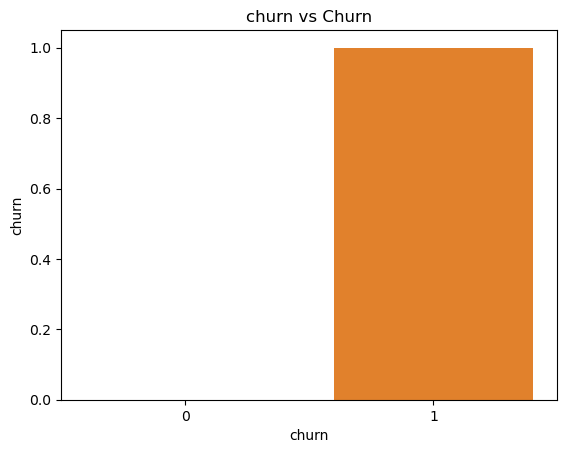


ANALYZE and SUMMARIZE
Observed
[[3104    0]
 [   0 1121]]

Expected
[[2280  823]
 [ 823  297]]

----
chi^2 = 4219.8715
p-value = 0.0000
----
We reject the null hypothesis.



CONTRACT_TYPE_ONE YEAR
0    3312
1     913
Name: contract_type_One year, dtype: int64
0    0.783905
1    0.216095
Name: contract_type_One year, dtype: float64


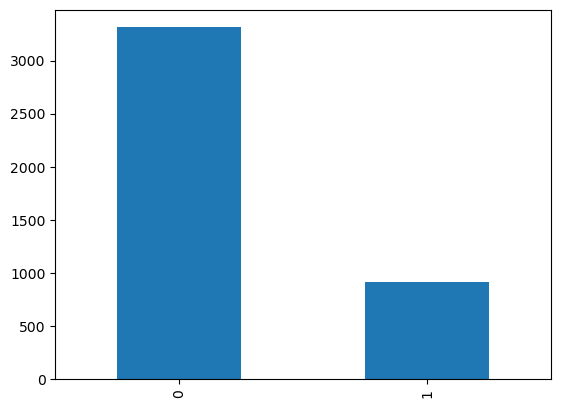



HYPOTHESIZE
H_0: contract type one year does not affect churn
H_a: contract type one year affects churn

VISUALIZE


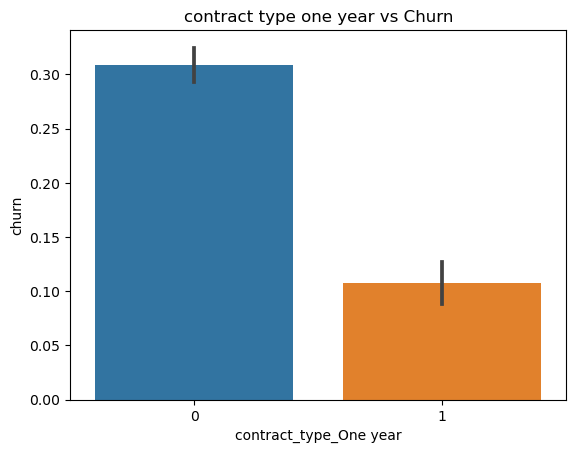


ANALYZE and SUMMARIZE
Observed
[[2289 1023]
 [ 815   98]]

Expected
[[2433  878]
 [ 670  242]]

----
chi^2 = 148.1016
p-value = 0.0000
----
We reject the null hypothesis.



CONTRACT_TYPE_TWO YEAR
0    3230
1     995
Name: contract_type_Two year, dtype: int64
0    0.764497
1    0.235503
Name: contract_type_Two year, dtype: float64


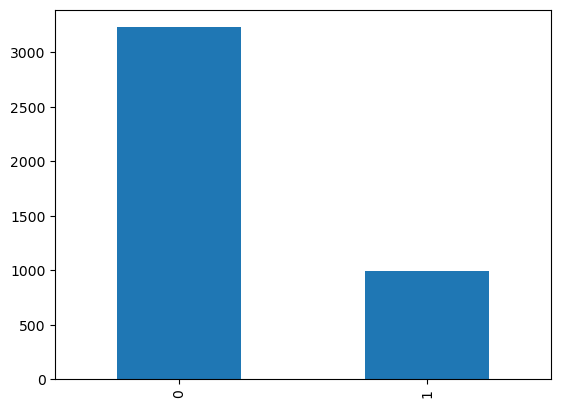



HYPOTHESIZE
H_0: contract type two year does not affect churn
H_a: contract type two year affects churn

VISUALIZE


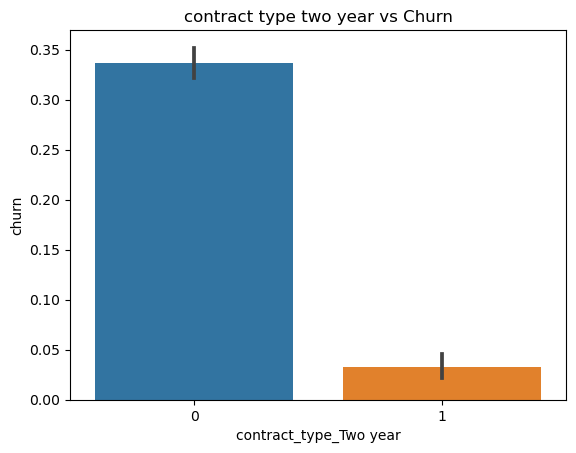


ANALYZE and SUMMARIZE
Observed
[[2142 1088]
 [ 962   33]]

Expected
[[2372  857]
 [ 731  263]]

----
chi^2 = 358.3147
p-value = 0.0000
----
We reject the null hypothesis.



PAYMENT_TYPE_CREDIT CARD (AUTOMATIC)
0    3306
1     919
Name: payment_type_Credit card (automatic), dtype: int64
0    0.782485
1    0.217515
Name: payment_type_Credit card (automatic), dtype: float64


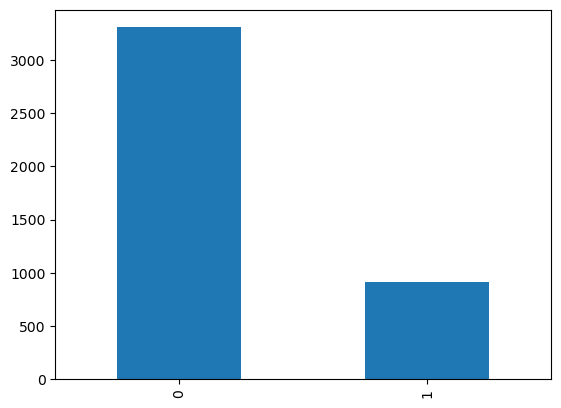



HYPOTHESIZE
H_0: payment type credit card (automatic) does not affect churn
H_a: payment type credit card (automatic) affects churn

VISUALIZE


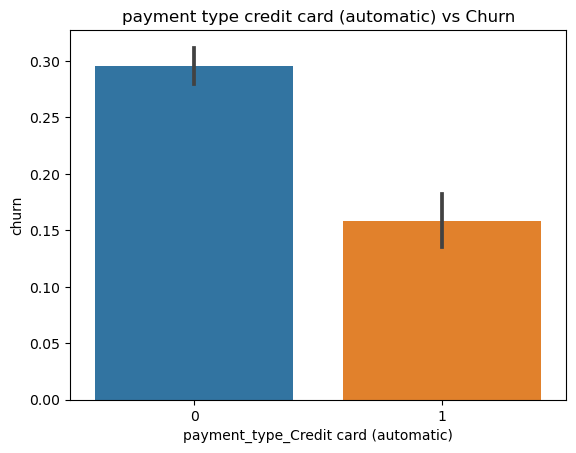


ANALYZE and SUMMARIZE
Observed
[[2330  976]
 [ 774  145]]

Expected
[[2428  877]
 [ 675  243]]

----
chi^2 = 68.9831
p-value = 0.0000
----
We reject the null hypothesis.



PAYMENT_TYPE_ELECTRONIC CHECK
0    2802
1    1423
Name: payment_type_Electronic check, dtype: int64
0    0.663195
1    0.336805
Name: payment_type_Electronic check, dtype: float64


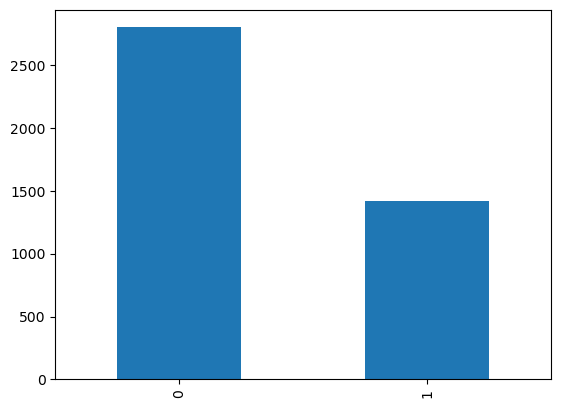



HYPOTHESIZE
H_0: payment type electronic check does not affect churn
H_a: payment type electronic check affects churn

VISUALIZE


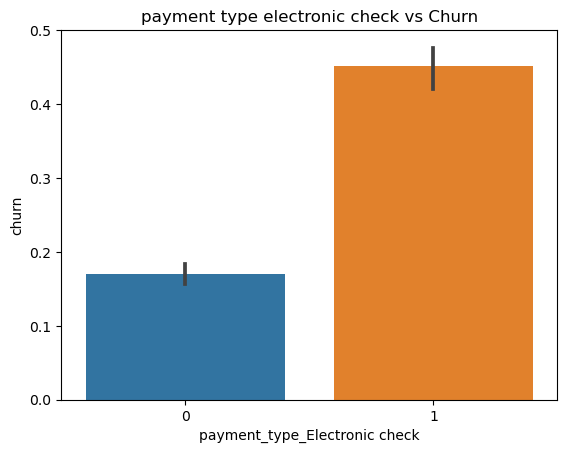


ANALYZE and SUMMARIZE
Observed
[[2324  478]
 [ 780  643]]

Expected
[[2058  743]
 [1045  377]]

----
chi^2 = 381.5760
p-value = 0.0000
----
We reject the null hypothesis.



PAYMENT_TYPE_MAILED CHECK
0    3275
1     950
Name: payment_type_Mailed check, dtype: int64
0    0.775148
1    0.224852
Name: payment_type_Mailed check, dtype: float64


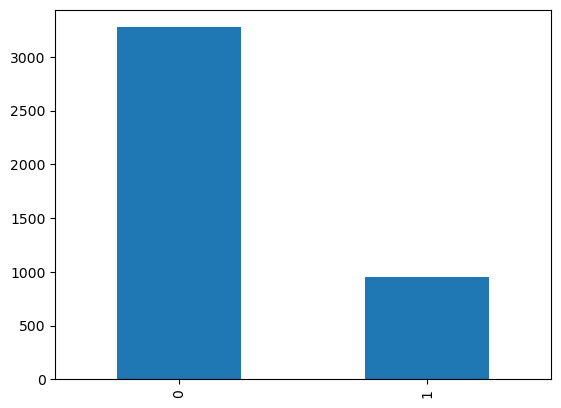



HYPOTHESIZE
H_0: payment type mailed check does not affect churn
H_a: payment type mailed check affects churn

VISUALIZE


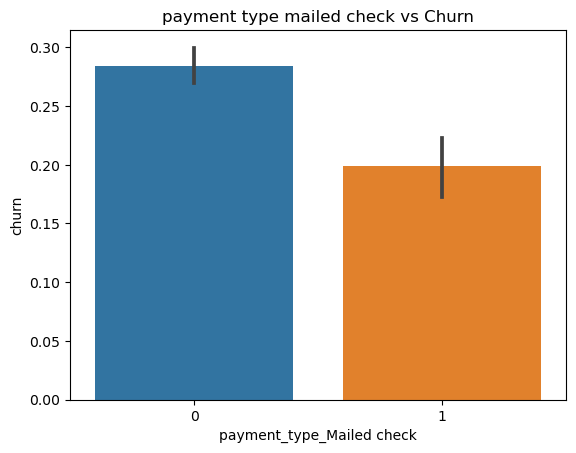


ANALYZE and SUMMARIZE
Observed
[[2343  932]
 [ 761  189]]

Expected
[[2406  868]
 [ 697  252]]

----
chi^2 = 27.2646
p-value = 0.0000
----
We reject the null hypothesis.



INTERNET_SERVICE_TYPE_FIBER OPTIC
0    2370
1    1855
Name: internet_service_type_Fiber optic, dtype: int64
0    0.560947
1    0.439053
Name: internet_service_type_Fiber optic, dtype: float64


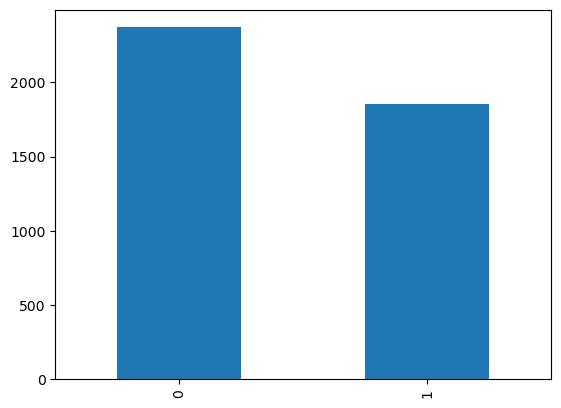



HYPOTHESIZE
H_0: internet service type fiber optic does not affect churn
H_a: internet service type fiber optic affects churn

VISUALIZE


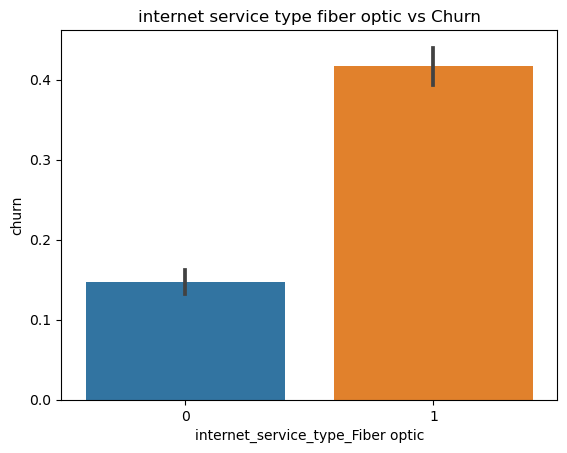


ANALYZE and SUMMARIZE
Observed
[[2022  348]
 [1082  773]]

Expected
[[1741  628]
 [1362  492]]

----
chi^2 = 387.4117
p-value = 0.0000
----
We reject the null hypothesis.



INTERNET_SERVICE_TYPE_NONE
0    3302
1     923
Name: internet_service_type_None, dtype: int64
0    0.781538
1    0.218462
Name: internet_service_type_None, dtype: float64


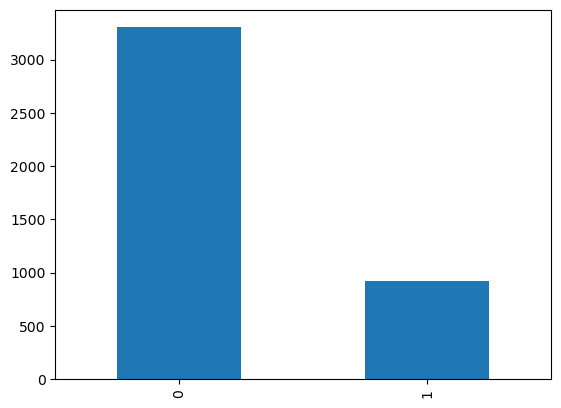



HYPOTHESIZE
H_0: internet service type none does not affect churn
H_a: internet service type none affects churn

VISUALIZE


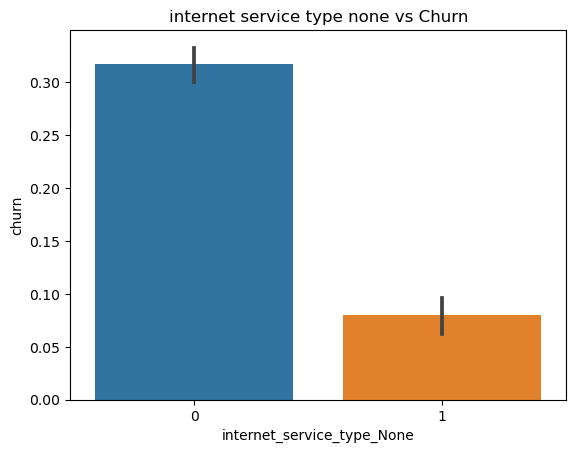


ANALYZE and SUMMARIZE
Observed
[[2255 1047]
 [ 849   74]]

Expected
[[2425  876]
 [ 678  244]]

----
chi^2 = 206.4856
p-value = 0.0000
----
We reject the null hypothesis.




In [322]:
for col in col_cat:
    print()
    print(col.upper())
    print(t_telco[col].value_counts())
    print(t_telco[col].value_counts(normalize=True))
    t_telco[col].value_counts().plot.bar()
    plt.show()
    print()
    print()
    print(f'HYPOTHESIZE')
    print(f"H_0: {col.lower().replace('_',' ')} does not affect churn")
    print(f"H_a: {col.lower().replace('_',' ')} affects churn")
    print()
    print(f'VISUALIZE')
    sns.barplot(x=t_telco[col], y=t_telco['churn'])
    plt.title(f"{col.lower().replace('_',' ')} vs Churn")
    plt.show()
    print()
    print('ANALYZE and SUMMARIZE')
    observed = pd.crosstab(t_telco[col], t_telco.churn)
    acq.chi2_test(observed)
    print()
    print()

#### Takeaways:

> remove:

    * is_male
    * phone_service
    * multiple_lines
    * streaming_tv
    * sreaming_movies
    
> as insignificant to actual churn

In [303]:
t_telco.columns.tolist()

['is_male',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type_One year',
 'contract_type_Two year',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check',
 'internet_service_type_Fiber optic',
 'internet_service_type_None']

In [304]:
t_telco_analyzed = t_telco[[
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type_One year',
 'contract_type_Two year',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check',
 'internet_service_type_Fiber optic',
 'internet_service_type_None']]

In [305]:
t_telco_analyzed

,senior_citizen,partner,dependents,tenure,online_security,online_backup,device_protection,tech_support,paperless_billing,monthly_charges,total_charges,churn,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None
5911,0,0,1,26,0,1,0,0,1,39.95,1023.75,0,1,0,0,0,0,0,0
2479,0,1,0,47,0,0,0,0,0,26.90,1250.85,0,1,0,0,1,0,0,1
5889,0,0,0,1,0,0,1,0,1,50.45,50.45,1,0,0,0,0,1,0,0
6087,0,0,0,69,1,1,0,1,1,60.05,4176.70,0,0,1,0,0,0,0,0
785,0,0,0,51,0,0,0,0,0,87.55,4475.90,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6102,0,1,0,2,0,1,1,0,0,79.70,165.00,1,0,0,0,0,0,1,0
356,1,0,0,52,0,1,1,1,1,50.50,2566.30,0,0,0,0,1,0,0,0
1756,0,0,0,4,0,0,0,0,1,70.20,237.95,1,0,0,0,1,0,1,0
2127,0,0,0,35,1,0,0,0,0,55.25,1924.10,0,0,1,0,0,1,0,0


> ## Numerical Values

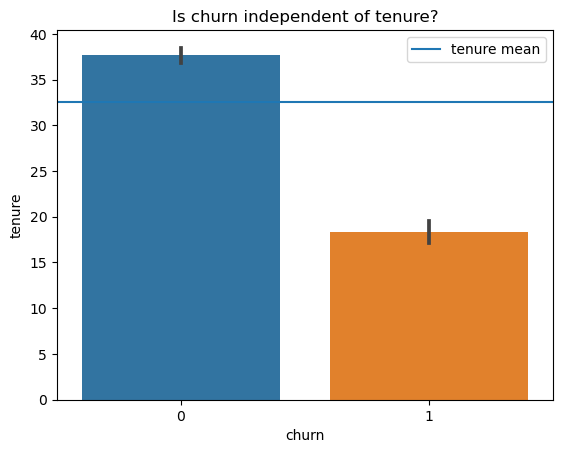

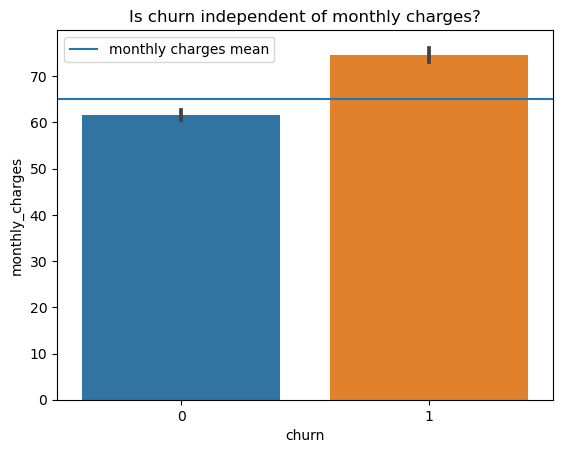

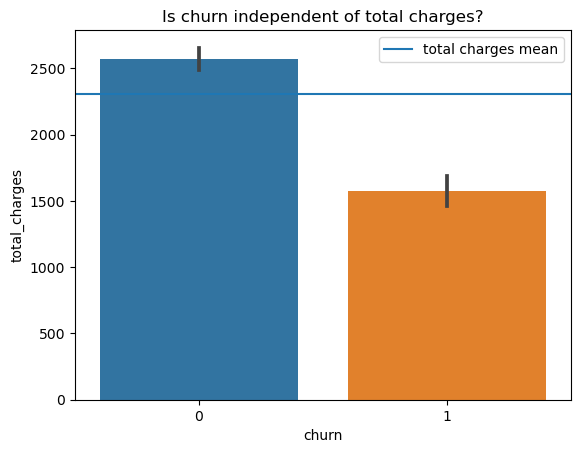

In [295]:
for col in col_num:
    sns.barplot(data=t_telco, x='churn', y=col)
    plt.title(f"Is churn independent of {col.lower().replace('_',' ')}?")
    pop_mn = t_telco[col].mean()
    plt.axhline(pop_mn, label=(f"{col.lower().replace('_',' ')} mean"))
    plt.legend()
    plt.show()
    print()

#### 1. Hypothesize

Q: does tenure incidate whether or not someone churned? 

what type of variables am i comparing?
- tenure is continuous
- churned is categorical

#### 2. Visualize

what kind of plot can i use? 
- boxplot
- swarmplot
- violinplot
- stripplot 

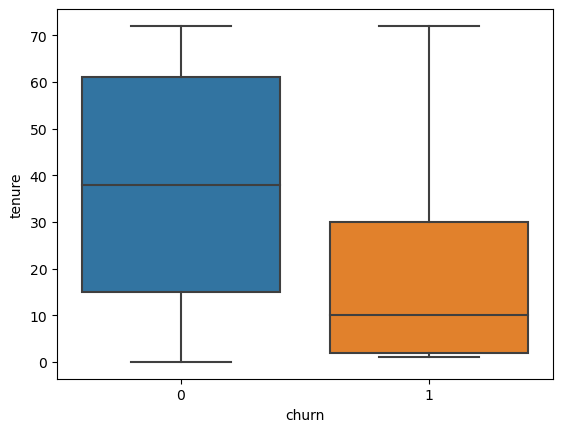

In [324]:
# plt.figure(figsize=(12,8))
sns.boxplot(data=t_telco, x='churn', y='tenure')
plt.show()

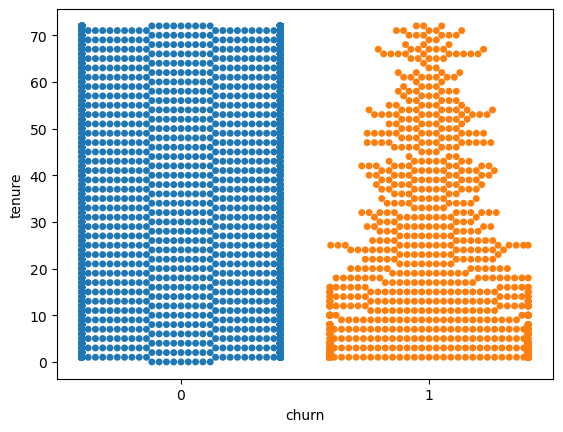

In [328]:
#better shows the density
sns.swarmplot(data=t_telco, x='churn', y='tenure');

In [333]:
t_telco.tenure.var(), t_telco.churn.var() # not equal variance

(601.8466494082824, 0.19497400035862802)

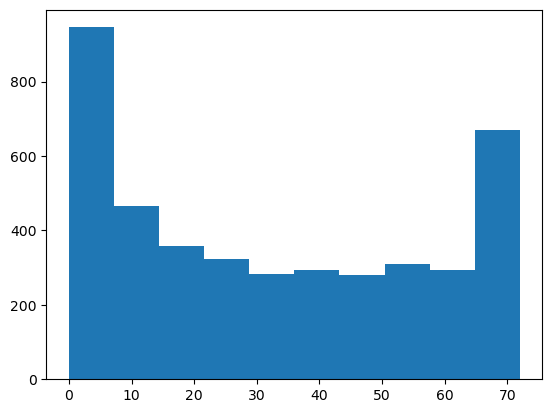

In [338]:
plt.hist(t_telco.tenure)
plt.show()

#### 3. Analyze (with statistics)

what type of test should i use for this?
- ttest


is my continuous value normally distributed?
- no, so this means we cant use ttest


am i comparing subpopulations to each other or a subpopulation to an overall population?
- we are comparing subpopulations to each other

A: mann-whitney



$H_0$: the mean of tenure for people who churned and who didn't churn is the same

$H_a$: the mean of tenure for people who churned and who didn't churn is not the same

In [339]:
churn_no_tenure = t_telco [t_telco.churn == 0].tenure

churn_yes_tenure = t_telco [t_telco.churn == 1].tenure

In [342]:
t, p = stats.mannwhitneyu(churn_no_tenure, churn_yes_tenure)
p
print(p)
if p < α:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

5.517423526326908e-124
We reject the null hypothesis


#### 4. Summarize

There is a difference in the tenure for people who did churn and people who didn't churn